<center><h1 style="color: orange;">Business Case</h1></center>
<center><h1 style="color: green;"> LoanTap - Logistic Regression </h1></center>
<center><h2 style="color: black;">Suman Debnath</h1></center>





<div style="text-align:center;">
  <img src="loantap.png" />
</div>


<center><h1 style="color: blue;">Introduction</h1></center>


**Introduction**

LoanTap is an online platform committed to delivering customized loan products to millennials. They innovate in an otherwise dull loan segment, to deliver instant, flexible loans on consumer friendly terms to salaried professionals and businessmen.

The data science team at LoanTap is building an underwriting layer to determine the creditworthiness of MSMEs as well as individuals.

LoanTap deploys formal credit to salaried individuals and businesses 4 main financial instruments:

- Personal Loan
- EMI Free Loan
- Personal Overdraft
- Advance Salary Loan

This case study will focus on the underwriting process behind Personal Loan only


**Dataset**

Dataset link: [logistic_regression.txt](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/003/549/original/logistic_regression.csv?1651045921)

**Column Profiling:**

- **loan_amnt**: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
- **term**: The number of payments on the loan. Values are in months and can be either 36 or 60.
- **int_rate**: Interest Rate on the loan.
- **installment**: The monthly payment owed by the borrower if the loan originates.
- **grade**: LoanTap assigned loan grade.
- **sub_grade**: LoanTap assigned loan subgrade.
- **emp_title**: The job title supplied by the Borrower when applying for the loan.*
- **emp_length**: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
- **home_ownership**: The home ownership status provided by the borrower during registration or obtained from the credit report.
- **annual_inc**: The self-reported annual income provided by the borrower during registration.
- **verification_status**: Indicates if income was verified by LoanTap, not verified, or if the income source was verified.
- **issue_d**: The month which the loan was funded.
- **loan_status**: Current status of the loan - Target Variable.
- **purpose**: A category provided by the borrower for the loan request.
- **title**: The loan title provided by the borrower.
- **dti**: A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LoanTap loan, divided by the borrower’s self-reported monthly income.
- **earliest_cr_line**: The month the borrower's earliest reported credit line was opened.
- **open_acc**: The number of open credit lines in the borrower's credit file.
- **pub_rec**: Number of derogatory public records.
- **revol_bal**: Total credit revolving balance.
- **revol_util**: Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
- **total_acc**: The total number of credit lines currently in the borrower's credit file.
- **initial_list_status**: The initial listing status of the loan. Possible values are – W, F.
- **application_type**: Indicates whether the loan is an individual application or a joint application with two co-borrowers.
- **mort_acc**: Number of mortgage accounts.
- **pub_rec_bankruptcies**: Number of public record bankruptcies.
- **Address**: Address of the individual.


<center><h1 style="color: red;">Summary</h1></center>

- **Data Overview: 396,030 data points, 26 features, 1 label.**

- Loan Status Distribution: 80% are fully paid (class 0), 20% are charged off (class 1).

- Loan Amount Insights: The median loan amount is marginally higher for charged-off loans.

- Term Impact: A 60-month term has a higher likelihood of charge-off.

- Interest Rates: Mean and median interest rates are elevated for charged-off loans.

- Loan Grade Risks: 
    - Higher charge-off probabilities are observed in loan grades E, F, and G.
    - Grade G exhibits the highest default likelihood.
    - This trend is also noticeable in the sub-grade probability plots.

- Employment Length: Shows similar default probabilities for both fully paid and defaulted loans, indicating no significant correlation with defaulting.

- Home Ownership:
    - Renters exhibit a higher default risk.
    - Homeowners with mortgages or outright ownership show lower default probabilities.

- Income Analysis: The median annual income is slightly higher among borrowers with fully paid loans.

- Income Verification:
    - Intriguingly, borrowers with verified income have a higher default rate compared to those whose income wasn't verified.

- Loan Purpose:
    - Predominantly for debt consolidation and credit card payoffs.
    - Small business owner borrowers show a higher default rate.

- Debt-to-Income Ratio: It's higher among defaulters.

- Credit Lines: The number of open credit lines is similar across fully paid and defaulted loans.

- Public Records:
    - An increase in derogatory public records correlates with a higher default probability.
    - Particularly notable in borrowers with over 12 public records.

- Revolving Credit:
    - Total revolving balances are comparable between fully paid and defaulted loans.
    - However, revolving utilization rates are higher in defaulters.

- Application Type: Direct-Pay applications tend to have a higher default probability than individual or joint applications.

- Bankruptcy Records: An increase in public record bankruptcies aligns with a higher likelihood of default.

- Key Predictive Features: Employee Title, Loan Grade and Sub-Grade, Interest Rate, and Debt-to-Income Ratio, as identified by Logistic Regression, Decision Tree Classifier, and Random Forest models.


<center><h1 style="color: red;">Recommendation</h1></center>

- **Optimizing Loan Decisions:**
    - Focus on achieving the highest possible precision in comparison to recall, while minimizing the false positive rate.
        - This strategy prevents missing out on financing opportunities and maximizes interest earnings. Implementing a higher threshold can help in achieving this.
        - Consider offering loans to applicants with a marginally higher risk of default as a method to boost earnings, balancing risk and reward.

- **Addressing Non-Performing Assets (NPA):**
    - In light of NPAs being a significant industry challenge, it's imperative to enhance due diligence and asset verification processes.
        - Attention is needed as data indicates that verified borrowers are more likely to default than non-verified ones.
        - Exercising caution with applicants lacking mortgaged or owned properties is advisable, as lending to this group may increase NPA risks.


<center><h1 style="color: green;">Detailed Analysis</h1></center>



## Importing all the `libs`

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import figure
import warnings
import statsmodels.api as sm
from scipy.stats import norm
from scipy.stats import t
import plotly.express as px

import scipy.stats as stats

warnings.filterwarnings('ignore')
%matplotlib inline


## Loading the `data`

In [2]:
data_set = 'https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/003/549/original/logistic_regression.csv?1651045921'
# data_set = 'jamboree_admission.csv'
df = pd.read_csv(data_set)

## Exploratory Data Exploration (EDA)

In [3]:
df.shape

(396030, 27)

In [4]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [5]:
df.dtypes

loan_amnt               float64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
title                    object
dti                     float64
earliest_cr_line         object
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
initial_list_status      object
application_type         object
mort_acc                float64
pub_rec_bankruptcies    float64
address                  object
dtype: object

In [6]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

### Check for `null` values

In [7]:
np.any(df.isna())

True

In [8]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

### Missing Value check and stat check

In [9]:
df["emp_title"].value_counts(dropna=False).sort_values(ascending=False).head(15)

emp_title
NaN                 22927
Teacher              4389
Manager              4250
Registered Nurse     1856
RN                   1846
Supervisor           1830
Sales                1638
Project Manager      1505
Owner                1410
Driver               1339
Office Manager       1218
manager              1145
Director             1089
General Manager      1074
Engineer              995
Name: count, dtype: int64

In [10]:
missing_cols = df.columns[df.isna().sum() != 0]

# Creating a DataFrame with the percentage of missing values
missingDF = pd.DataFrame(data=df[missing_cols].isna().sum() / df.shape[0] * 100, columns=['percentage of missing data'])
missingDF['total'] = df[missing_cols].isna().sum()

# Printing the result
missingDF

,percentage of missing data,total
emp_title,5.789208,22927
emp_length,4.621115,18301
title,0.443401,1756
revol_util,0.069692,276
mort_acc,9.543469,37795
pub_rec_bankruptcies,0.135091,535


In [11]:
df.describe().round(1)

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.0,396030.0,396030.0,396030.0,396030.0,396030.0,396030.0,396030.0,395754.0,396030.0,358235.0,395495.0
mean,14113.9,13.6,431.8,74203.2,17.4,11.3,0.2,15844.5,53.8,25.4,1.8,0.1
std,8357.4,4.5,250.7,61637.6,18.0,5.1,0.5,20591.8,24.5,11.9,2.1,0.4
min,500.0,5.3,16.1,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
25%,8000.0,10.5,250.3,45000.0,11.3,8.0,0.0,6025.0,35.8,17.0,0.0,0.0
50%,12000.0,13.3,375.4,64000.0,16.9,10.0,0.0,11181.0,54.8,24.0,1.0,0.0
75%,20000.0,16.5,567.3,90000.0,23.0,14.0,0.0,19620.0,72.9,32.0,3.0,0.0
max,40000.0,31.0,1533.8,8706582.0,9999.0,90.0,86.0,1743266.0,892.3,151.0,34.0,8.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [13]:
columns_type = df.dtypes

In [14]:
columns_type[columns_type=="object"]

term                   object
grade                  object
sub_grade              object
emp_title              object
emp_length             object
home_ownership         object
verification_status    object
issue_d                object
loan_status            object
purpose                object
title                  object
earliest_cr_line       object
initial_list_status    object
application_type       object
address                object
dtype: object

#### Data type (Categorical or Numeric)

In [15]:
import pandas as pd

# Selecting numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64'])
num_numerical_features = numerical_features.shape[1]

# Selecting categorical features
categorical_features = df.select_dtypes(include=['object', 'category'])
num_categorical_features = categorical_features.shape[1]

# Printing the count
print(f"Number of Numerical Features: {num_numerical_features}")
print(f"Number of Categorical Features: {num_categorical_features}")


Number of Numerical Features: 12
Number of Categorical Features: 15


#### Data is balanced or immbalanced ? 

In [16]:
df["loan_status"].value_counts(normalize=True)*100

loan_status
Fully Paid     80.387092
Charged Off    19.612908
Name: proportion, dtype: float64

#### Checking the correlation 

In [17]:
categorical_features

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type,address
0,36 months,B,B4,Marketing,10+ years,RENT,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,Jun-1990,w,INDIVIDUAL,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,36 months,B,B5,Credit analyst,4 years,MORTGAGE,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,Jul-2004,f,INDIVIDUAL,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,36 months,B,B3,Statistician,< 1 year,RENT,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,Aug-2007,f,INDIVIDUAL,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,36 months,A,A2,Client Advocate,6 years,RENT,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,Sep-2006,f,INDIVIDUAL,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,60 months,C,C5,Destiny Management Inc.,9 years,MORTGAGE,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,Mar-1999,f,INDIVIDUAL,"679 Luna Roads\r\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,60 months,B,B4,licensed bankere,2 years,RENT,Source Verified,Oct-2015,Fully Paid,debt_consolidation,Debt consolidation,Nov-2004,w,INDIVIDUAL,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,36 months,C,C1,Agent,5 years,MORTGAGE,Source Verified,Feb-2015,Fully Paid,debt_consolidation,Debt consolidation,Feb-2006,f,INDIVIDUAL,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,36 months,B,B1,City Carrier,10+ years,RENT,Verified,Oct-2013,Fully Paid,debt_consolidation,pay off credit cards,Mar-1997,f,INDIVIDUAL,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,60 months,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,Verified,Aug-2012,Fully Paid,debt_consolidation,Loanforpayoff,Nov-1990,f,INDIVIDUAL,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."


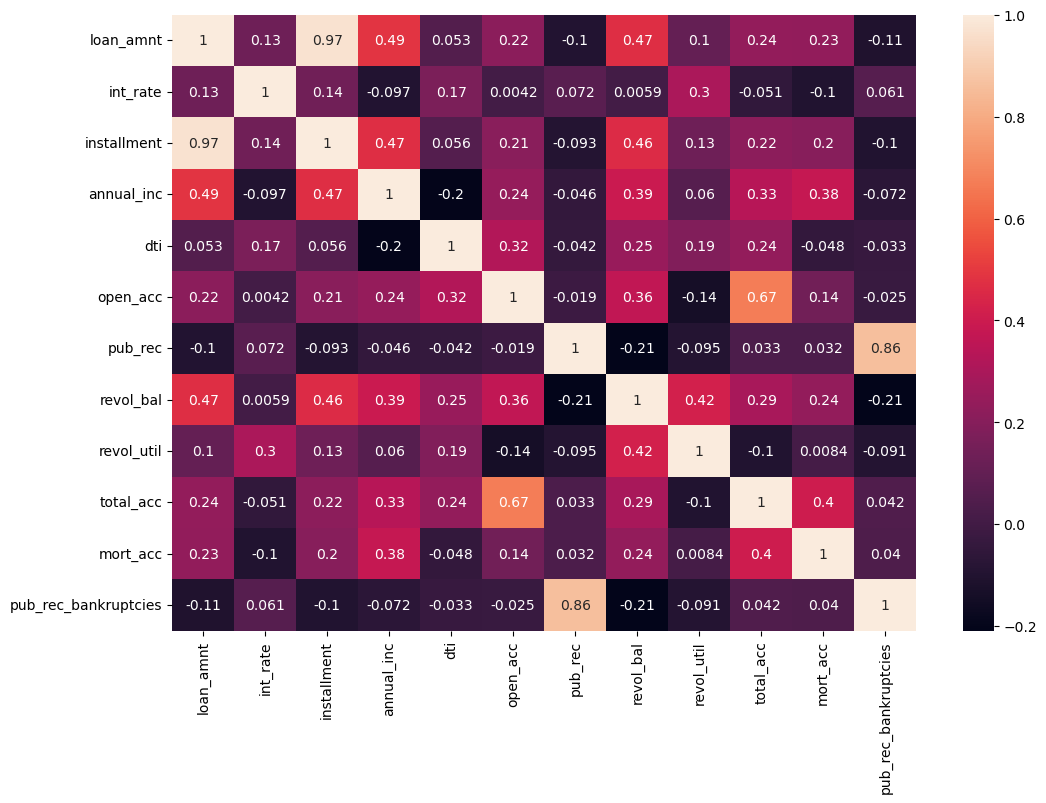

In [18]:
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_features.corr(method='spearman'), annot=True)
plt.show()

### Feacture Exploration 

#### `loan_amnt` 

In [19]:
df.groupby(by = "loan_status")["loan_amnt"].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


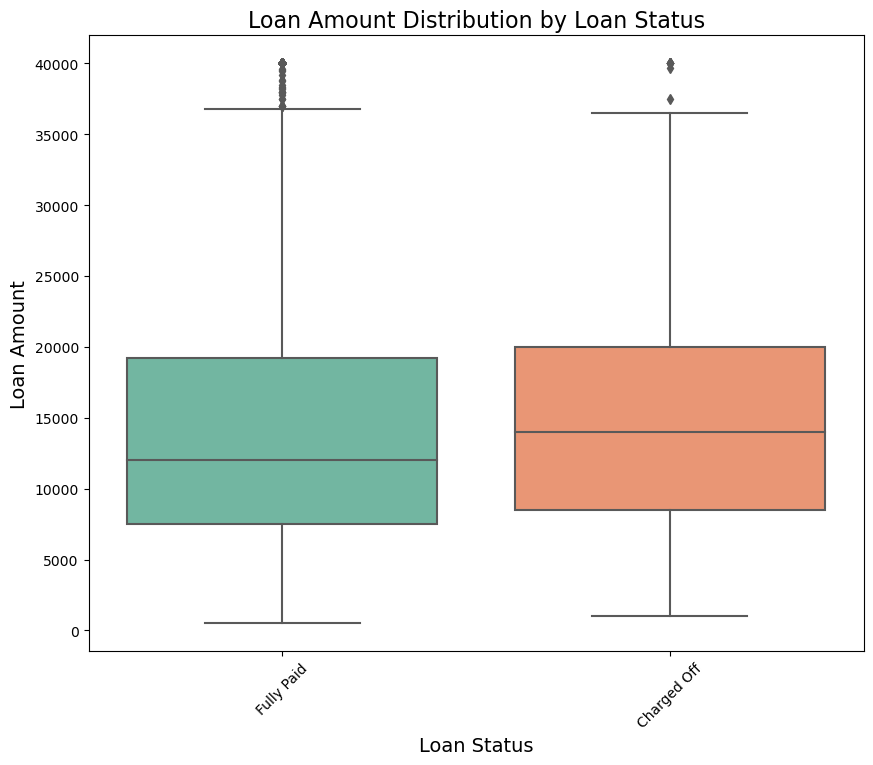

In [20]:
plt.figure(figsize=(10, 8))  # Adjusted figure size

# Creating the boxplot
sns.boxplot(y=df["loan_amnt"], x=df["loan_status"],
            palette="Set2")  # Custom color palette

# Adding title and labels with increased font size for better readability
plt.title("Loan Amount Distribution by Loan Status", fontsize=16)
plt.xlabel("Loan Status", fontsize=14)
plt.ylabel("Loan Amount", fontsize=14)

# Rotating x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()


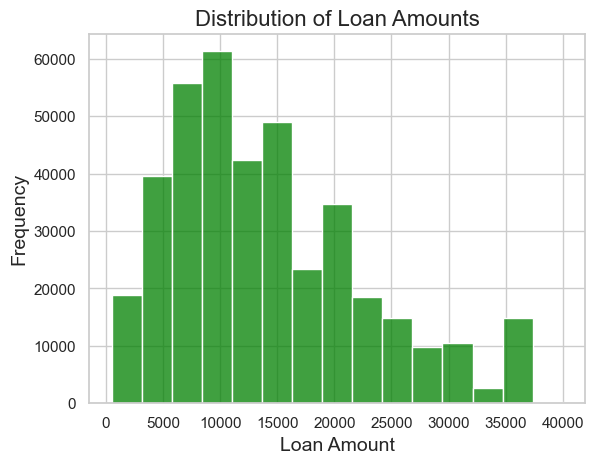

In [21]:
sns.set(style="whitegrid")

# Creating the histogram
sns.histplot(df["loan_amnt"], bins=15, color="green")

# Adding title and labels
plt.title("Distribution of Loan Amounts", fontsize=16)
plt.xlabel("Loan Amount", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Displaying the plot
plt.show()

#### `term` 

In [22]:
df["term"].value_counts(dropna=False)

term
 36 months    302005
 60 months     94025
Name: count, dtype: int64

In [23]:
pd.crosstab(index=df["term"],
            columns=df["loan_status"], 
            normalize="index" , 
            margins  = True) * 100

loan_status,Charged Off,Fully Paid
term,,
36 months,15.774573,84.225427
60 months,31.941505,68.058495
All,19.612908,80.387092


<Axes: xlabel='term'>

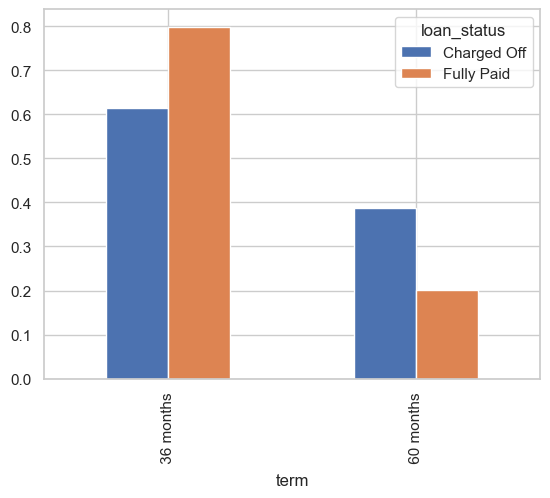

In [24]:
pd.crosstab(index=df["term"],
            columns =df["loan_status"], normalize="columns"
           ).plot(kind = "bar")

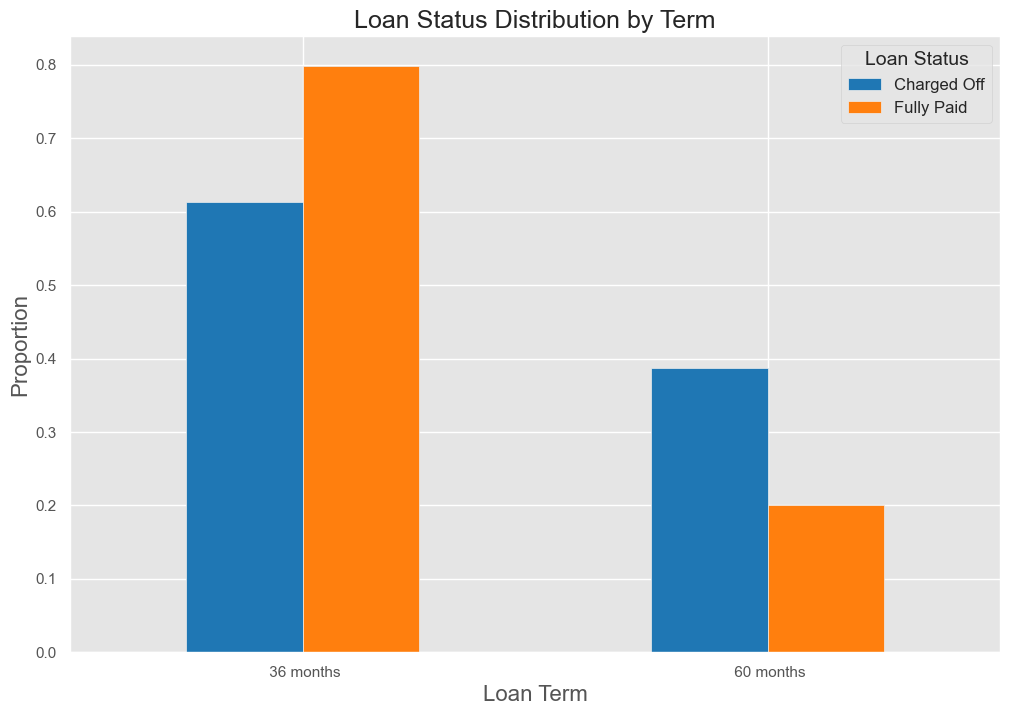

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('ggplot')

# Crosstabulation and plotting
cross_tab = pd.crosstab(index=df["term"], columns=df["loan_status"], normalize="columns")
cross_tab.plot(kind="bar", figsize=(12, 8), color=["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b"])  # Custom colors for bars

# Adding title and labels with increased font size
plt.title("Loan Status Distribution by Term", fontsize=18)
plt.xlabel("Loan Term", fontsize=16)
plt.ylabel("Proportion", fontsize=16)
plt.xticks(rotation=0)  # Adjust rotation as needed

# Displaying the legend
plt.legend(title="Loan Status", fontsize=12, title_fontsize=14)

# Show the plot
plt.show()


In [26]:
# Changing catagorical feature into a numerical format 
term_values = {' 36 months': 36, ' 60 months': 60}
df['term'] = df['term'].map(term_values)

#### `int_rate`

In [27]:
df.groupby(by = "loan_status")["int_rate"].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15.882587,4.388135,5.32,12.99,15.61,18.64,30.99
Fully Paid,318357.0,13.092105,4.319105,5.32,9.91,12.99,15.61,30.99


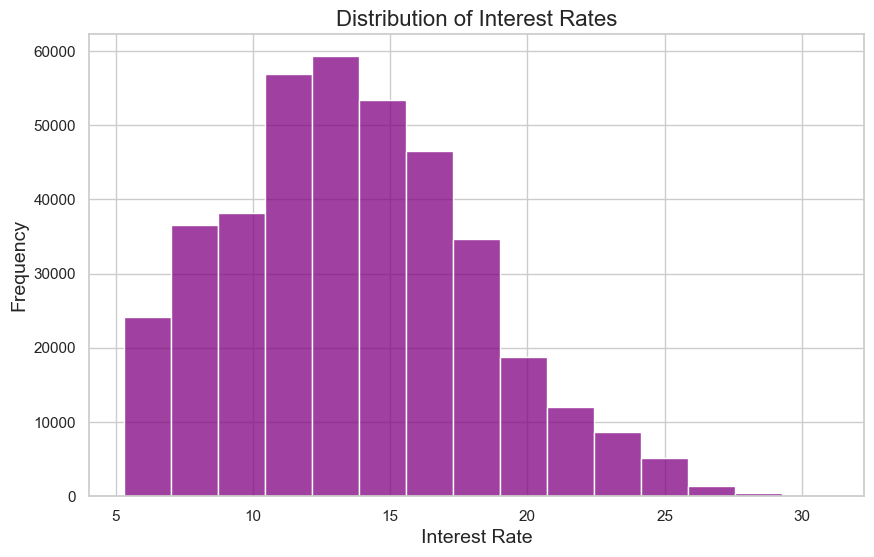

In [28]:
# Setting the figure size and style
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Creating the histogram
sns.histplot(df["int_rate"], bins=15, color="purple")

# Adding title and labels
plt.title("Distribution of Interest Rates", fontsize=16)
plt.xlabel("Interest Rate", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Displaying the plot
plt.show()


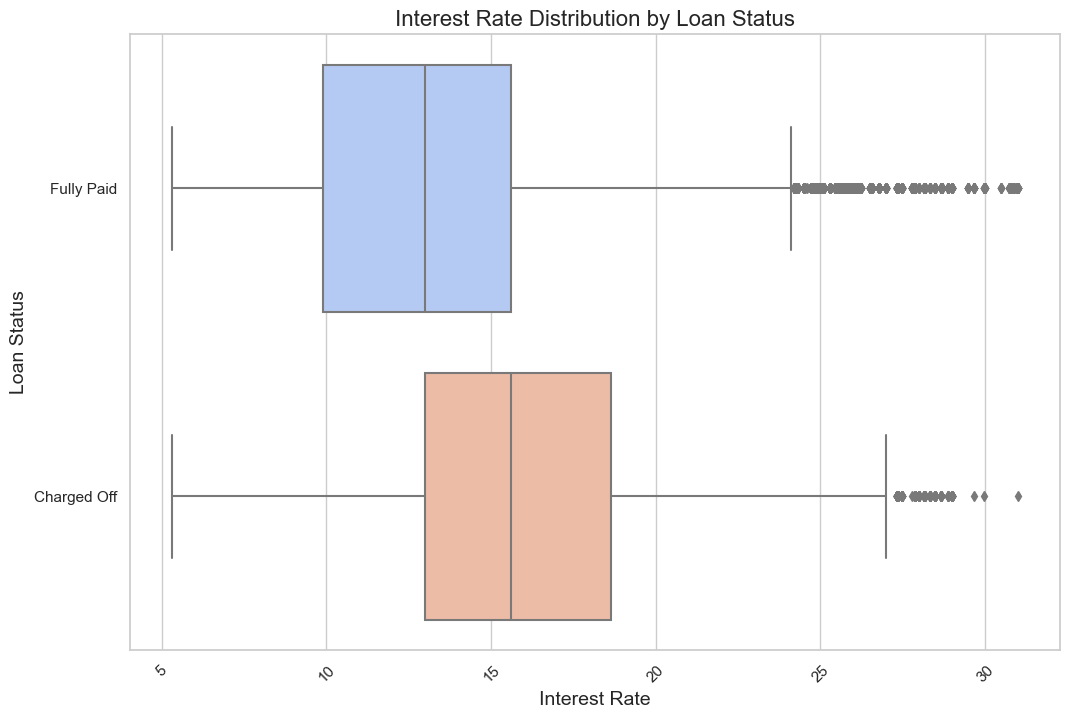

In [29]:
# Setting the figure size for better visibility
plt.figure(figsize=(12, 8))

# Creating the boxplot with a custom color palette
sns.boxplot(x=df["int_rate"], y=df["loan_status"], palette="coolwarm")

# Adding a title and labels with increased font size
plt.title("Interest Rate Distribution by Loan Status", fontsize=16)
plt.xlabel("Interest Rate", fontsize=14)
plt.ylabel("Loan Status", fontsize=14)

# Optionally, rotate x-axis labels if they are overlapping or to improve readability
plt.xticks(rotation=45)

# Displaying the plot
plt.show()

In [30]:
df[df["loan_status"] == "Charged Off"]["int_rate"].median(),df[df["loan_status"] == "Charged Off"]["int_rate"].mean()


(15.61, 15.882587256833133)

In [31]:
df[df["loan_status"] == "Fully Paid"]["int_rate"].median(),df[df["loan_status"] == "Fully Paid"]["int_rate"].mean()

(12.99, 13.092105403682032)

#### `grade`

<Axes: xlabel='grade'>

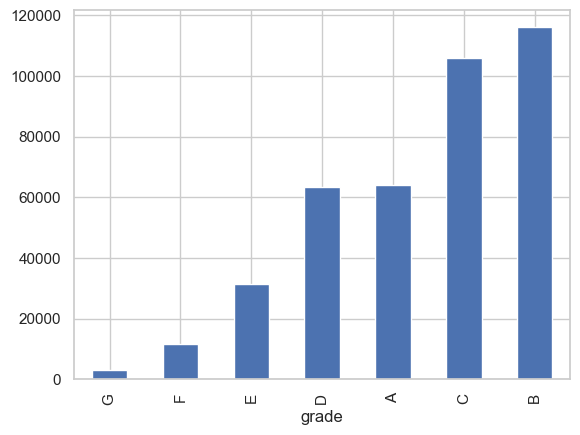

In [32]:
df["grade"].value_counts().sort_values().plot(kind = "bar")

In [33]:
df["grade"].value_counts(dropna=False)

grade
B    116018
C    105987
A     64187
D     63524
E     31488
F     11772
G      3054
Name: count, dtype: int64

In [34]:
pd.crosstab(index = df["grade"],
            columns= df["loan_status"],normalize= "index", margins = True)

loan_status,Charged Off,Fully Paid
grade,,
A,0.062879,0.937121
B,0.125730,0.874270
C,0.211809,0.788191
D,0.288678,0.711322
E,0.373634,0.626366
F,0.427880,0.572120
G,0.478389,0.521611
All,0.196129,0.803871


<Axes: xlabel='grade'>

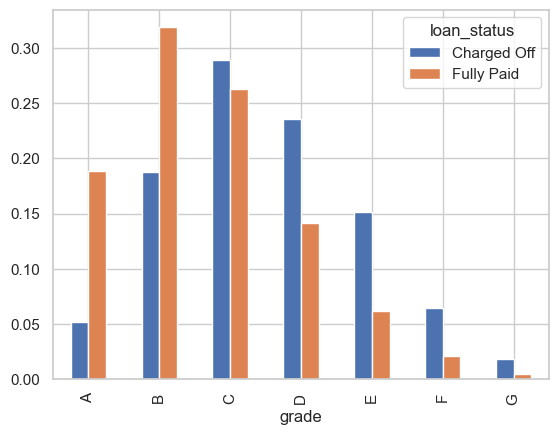

In [35]:
pd.crosstab(index = df["grade"],
            columns= df["loan_status"],normalize= "columns").plot(kind  = "bar")

#### `sub_grade`

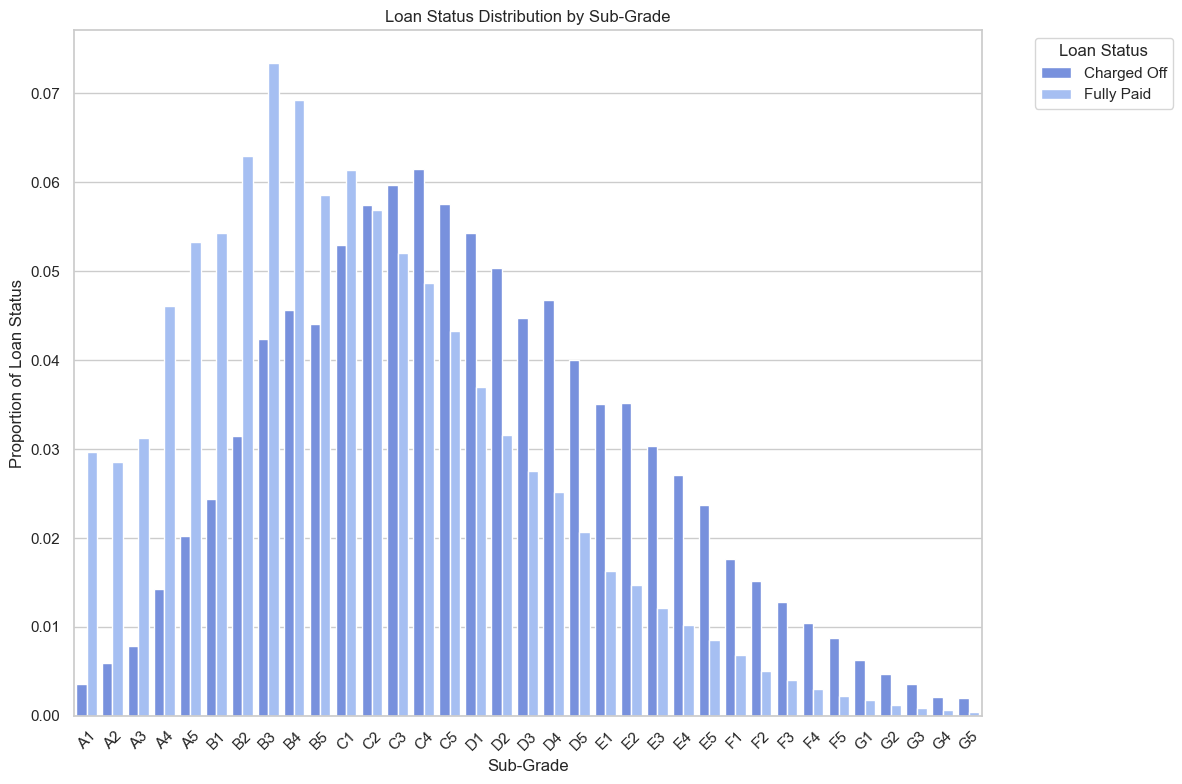

In [36]:
# Create a crosstab
sub_grade_status_ct = pd.crosstab(index=df["sub_grade"],
                                  columns=df["loan_status"],
                                  normalize="columns").reset_index()

# Melt the DataFrame for Seaborn plotting
sub_grade_status_melted = sub_grade_status_ct.melt(id_vars='sub_grade', var_name='loan_status', value_name='proportion')

# Set Seaborn style and color palette
sns.set_style("whitegrid")
sns.set_palette("coolwarm")

# Plotting with Seaborn
plt.figure(figsize=(12, 8))  # Adjust figure size
sns.barplot(x='sub_grade', y='proportion', hue='loan_status', data=sub_grade_status_melted)

# Customizing the plot
plt.title("Loan Status Distribution by Sub-Grade")  # Title
plt.xlabel("Sub-Grade")  # X-axis label
plt.ylabel("Proportion of Loan Status")  # Y-axis label
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')  # Positioning the legend outside the plot
plt.tight_layout()  # Adjust layout

plt.show()  # Display the plot


#### `emp_title`

In [37]:
df["emp_length"].value_counts(dropna=False)

emp_length
10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
NaN           18301
9 years       15314
Name: count, dtype: int64

In [38]:
pd.crosstab(index = df["emp_length"],
            columns= df["loan_status"],
            normalize= "index")*100

loan_status,Charged Off,Fully Paid
emp_length,,
1 year,19.913453,80.086547
10+ years,18.418610,81.581390
2 years,19.326206,80.673794
3 years,19.523133,80.476867
4 years,19.238477,80.761523
5 years,19.218721,80.781279
6 years,18.919438,81.080562
7 years,19.477400,80.522600
8 years,19.976002,80.023998


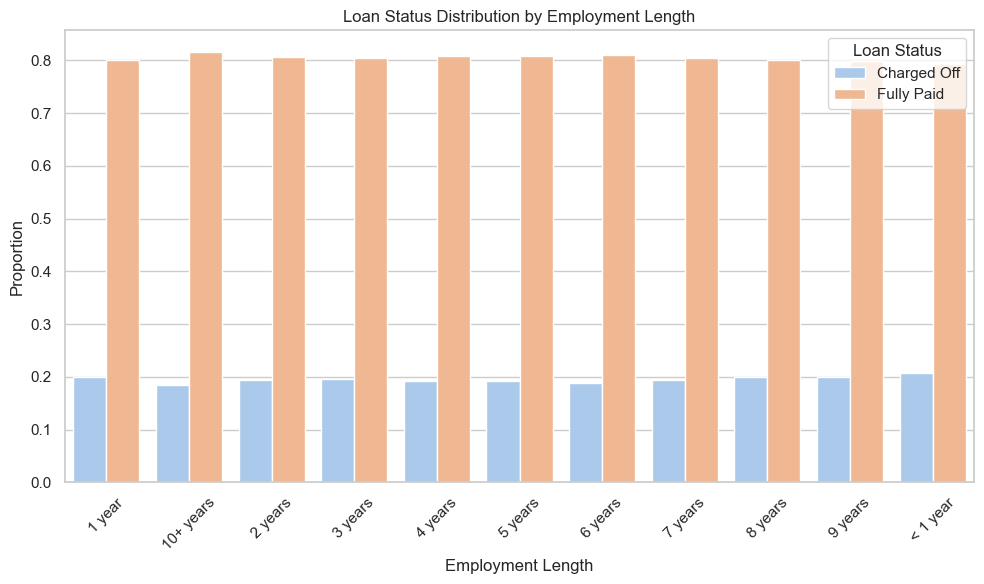

In [39]:
# Create a crosstab
emp_loan_status_ct = pd.crosstab(index=df["emp_length"],
                                 columns=df["loan_status"],
                                 normalize="index").reset_index()

# Melt the DataFrame for easier plotting with seaborn
emp_loan_status_melted = emp_loan_status_ct.melt(id_vars='emp_length', var_name='loan_status', value_name='proportion')

# Set the color palette
sns.set_palette("pastel")

# Plotting with Seaborn
plt.figure(figsize=(10, 6))  # Adjust figure size
sns.barplot(x='emp_length', y='proportion', hue='loan_status', data=emp_loan_status_melted)

# Customizing the plot
plt.title("Loan Status Distribution by Employment Length")  # Title
plt.xlabel("Employment Length")  # X-axis label
plt.ylabel("Proportion")  # Y-axis label
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.legend(title='Loan Status')  # Customize legend
plt.tight_layout()  # Adjust layout

plt.show()  # Display the plot


#### `home_ownership`

In [40]:
df["home_ownership"].value_counts(dropna=False)

home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: count, dtype: int64

In [41]:
df["home_ownership"] = df["home_ownership"].replace({"NONE":"OTHER", "ANY":"OTHER"})

In [42]:
pd.crosstab(index = df["home_ownership"],
            columns= df["loan_status"],normalize= "index", margins = True)*100

loan_status,Charged Off,Fully Paid
home_ownership,,
MORTGAGE,16.956057,83.043943
OTHER,15.753425,84.246575
OWN,20.680337,79.319663
RENT,22.662244,77.337756
All,19.612908,80.387092


<Axes: xlabel='home_ownership'>

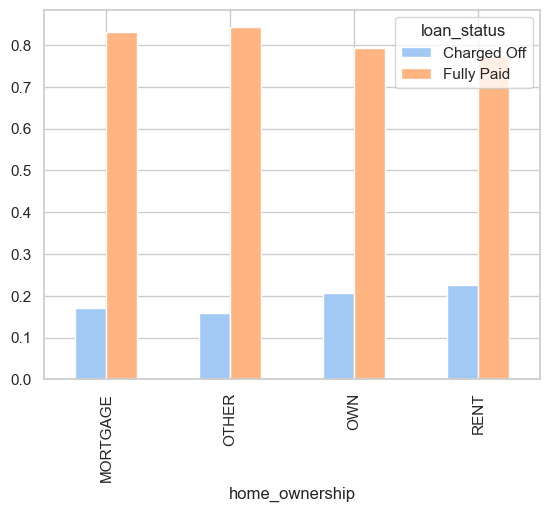

In [43]:
pd.crosstab(index = df["home_ownership"],
            columns= df["loan_status"],normalize= "index").plot(kind= "bar")

#### `annual_inc`

<Axes: xlabel='annual_inc', ylabel='Density'>

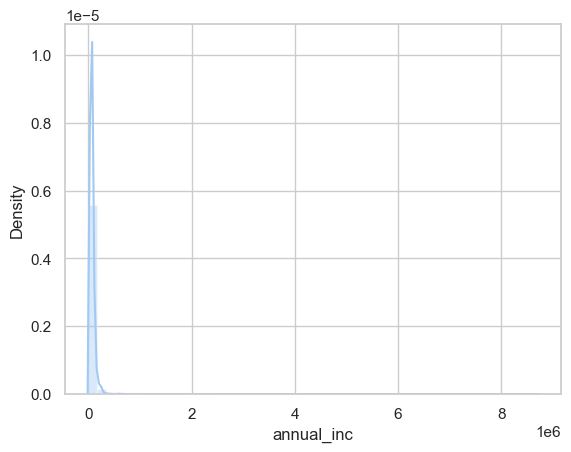

In [44]:
sns.distplot(df["annual_inc"])

In [45]:
df["annual_inc"].describe()

count    3.960300e+05
mean     7.420318e+04
std      6.163762e+04
min      0.000000e+00
25%      4.500000e+04
50%      6.400000e+04
75%      9.000000e+04
max      8.706582e+06
Name: annual_inc, dtype: float64

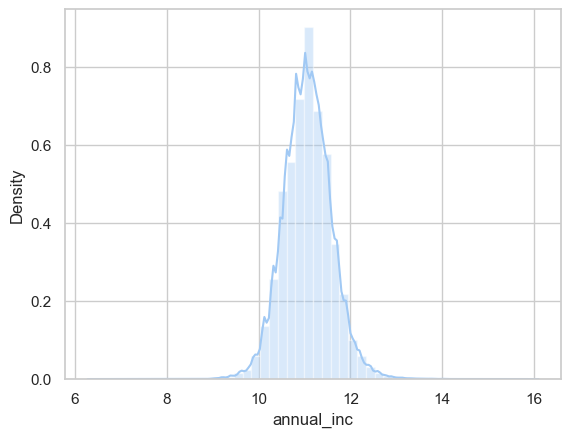

In [46]:
sns.distplot(np.log(df[df["annual_inc"]>0]["annual_inc"]));

<Axes: xlabel='loan_status', ylabel='annual_inc'>

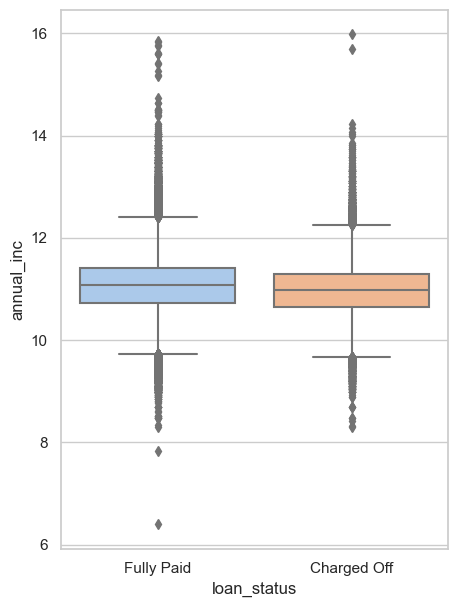

In [47]:
plt.figure(figsize=(5,7))
sns.boxplot(y=np.log(df[df["annual_inc"]>0]["annual_inc"]),
            x=df["loan_status"])

#### `verification_status`

In [48]:
df["verification_status"].value_counts(dropna=False)

verification_status
Verified           139563
Source Verified    131385
Not Verified       125082
Name: count, dtype: int64

In [49]:
pd.crosstab(index = df["verification_status"],
            columns= df["loan_status"],normalize= "index", margins = True)*100

loan_status,Charged Off,Fully Paid
verification_status,,
Not Verified,14.635999,85.364001
Source Verified,21.474293,78.525707
Verified,22.321102,77.678898
All,19.612908,80.387092


<Axes: xlabel='verification_status'>

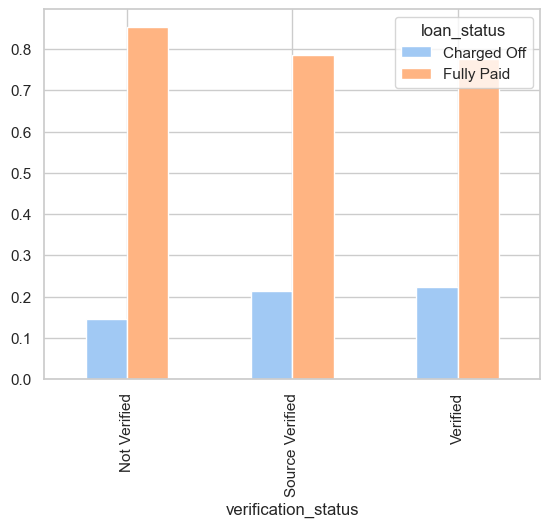

In [50]:
pd.crosstab(index = df["verification_status"],
            columns= df["loan_status"],normalize= "index").plot(kind = "bar")

#### `purpose`

In [51]:
df["purpose"].nunique()

14

In [52]:
pd.crosstab(index = df["purpose"],
            columns= df["loan_status"],normalize= "index", margins = True)*100


loan_status,Charged Off,Fully Paid
purpose,,
car,13.476687,86.523313
credit_card,16.711837,83.288163
debt_consolidation,20.741385,79.258615
educational,16.342412,83.657588
home_improvement,17.007907,82.992093
house,19.718310,80.281690
major_purchase,16.473265,83.526735
medical,21.711153,78.288847
moving,23.475823,76.524177


<Axes: xlabel='purpose'>

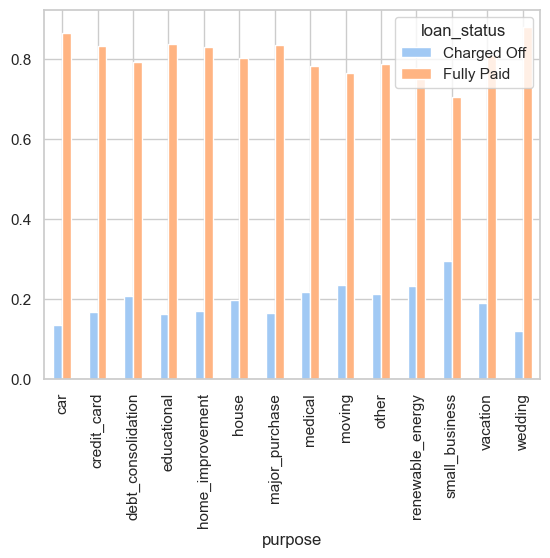

In [53]:
pd.crosstab(index = df["purpose"],
            columns= df["loan_status"],normalize= "index").plot(kind = "bar")

<Axes: xlabel='purpose'>

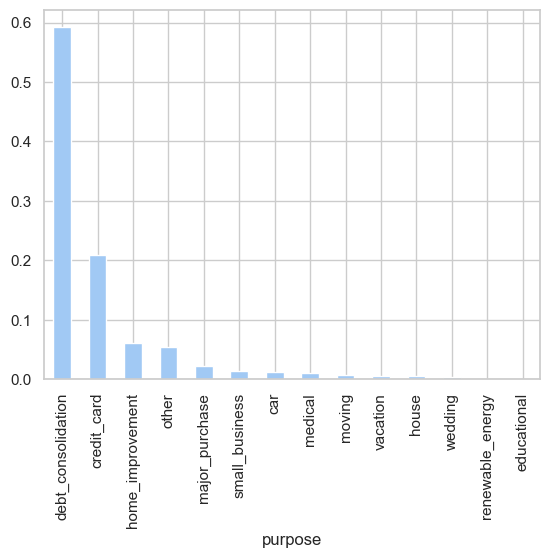

In [54]:
(df["purpose"].value_counts(dropna=False,normalize=True)).plot(kind = "bar")


#### `title`

In [55]:
df["title"].nunique()

48816

In [56]:
df["title"]

0                        Vacation
1              Debt consolidation
2         Credit card refinancing
3         Credit card refinancing
4           Credit Card Refinance
                   ...           
396025         Debt consolidation
396026         Debt consolidation
396027       pay off credit cards
396028              Loanforpayoff
396029          Toxic Debt Payoff
Name: title, Length: 396030, dtype: object

#### `dti`

In [57]:
df["dti"].describe()

count    396030.000000
mean         17.379514
std          18.019092
min           0.000000
25%          11.280000
50%          16.910000
75%          22.980000
max        9999.000000
Name: dti, dtype: float64

<Axes: >

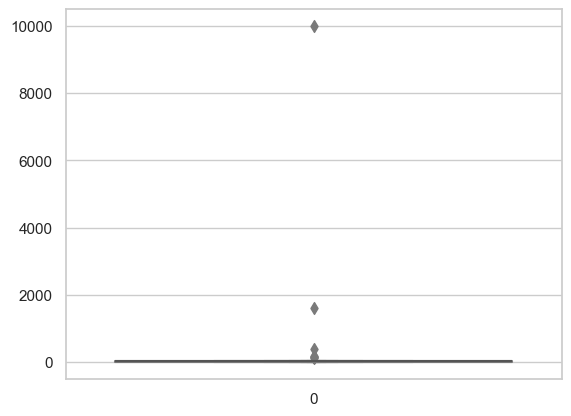

In [58]:
sns.boxenplot((df["dti"]))

<Axes: xlabel='loan_status', ylabel='dti'>

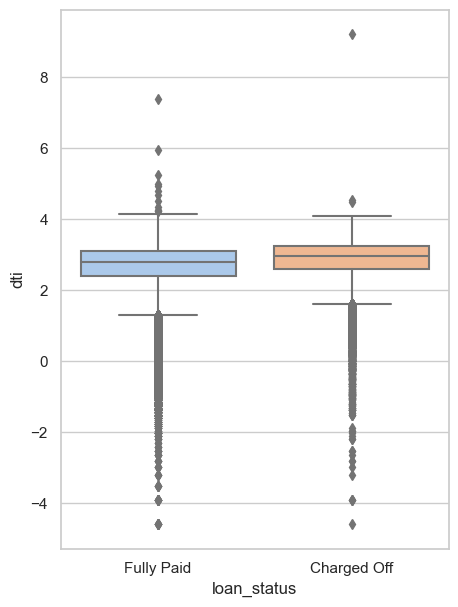

In [59]:
plt.figure(figsize=(5,7))
sns.boxplot(y=np.log(df[df["dti"]>0]["dti"]),
            x=df["loan_status"])

#### `earliest_cr_line`

In [60]:
df["Loan_Tenure"] = ((pd.to_datetime(df["issue_d"]) -pd.to_datetime(df["earliest_cr_line"]))/np.timedelta64(1, 'M'))

<Axes: ylabel='Count'>

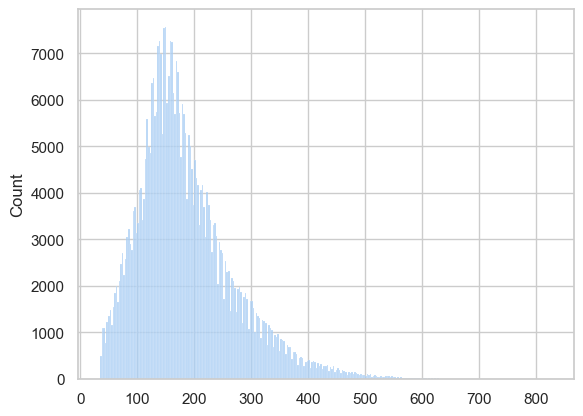

In [61]:
 sns.histplot(((pd.to_datetime(df["issue_d"]) -pd.to_datetime(df["earliest_cr_line"]))/np.timedelta64(1, 'M')))


<Axes: xlabel='loan_status'>

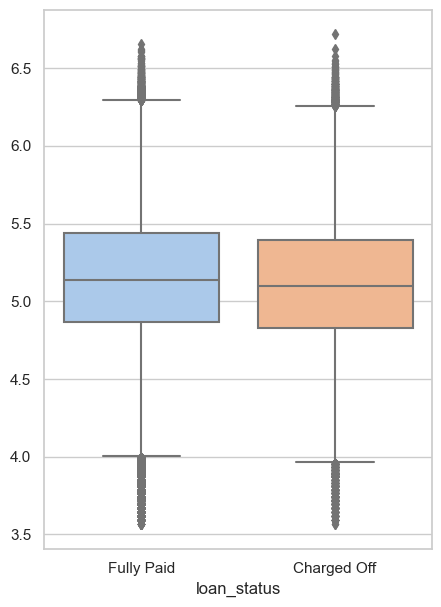

In [62]:
plt.figure(figsize=(5,7))
sns.boxplot(y=np.log(((pd.to_datetime(df["issue_d"]) - pd.to_datetime(df["earliest_cr_line"]))/np.timedelta64(1, 'M'))),
            x=df["loan_status"])

#### `open_acc`

In [63]:
df.groupby("loan_status")["open_acc"].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,11.602513,5.288507,0.0,8.0,11.0,14.0,76.0
Fully Paid,318357.0,11.240067,5.097647,0.0,8.0,10.0,14.0,90.0


In [64]:
df["open_acc"].nunique()

61

<Axes: xlabel='open_acc', ylabel='Count'>

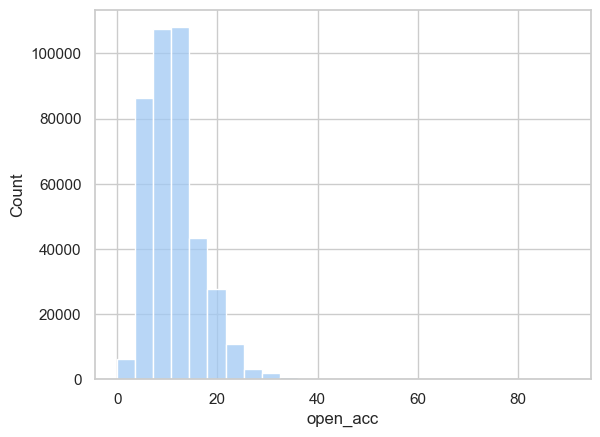

In [65]:
sns.histplot(df["open_acc"],bins = 25)


<Axes: xlabel='loan_status', ylabel='open_acc'>

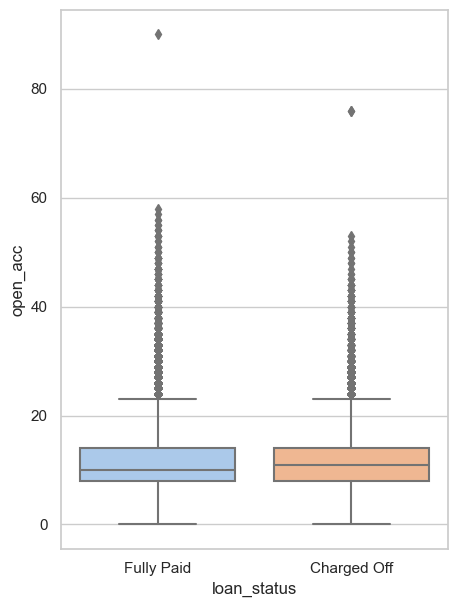

In [66]:
plt.figure(figsize=(5,7))
sns.boxplot(y= df["open_acc"],
            x=df["loan_status"])

#### `pub_rec`

In [67]:
df.groupby("loan_status")["pub_rec"].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,0.199606,0.648283,0.0,0.0,0.0,0.0,86.0
Fully Paid,318357.0,0.172966,0.497637,0.0,0.0,0.0,0.0,24.0


<Axes: xlabel='loan_status', ylabel='pub_rec'>

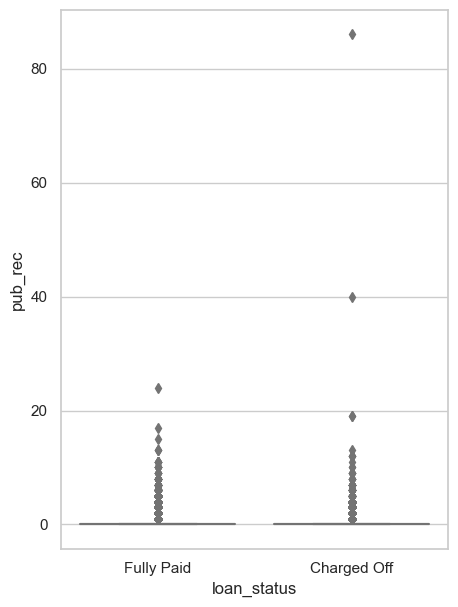

In [68]:
plt.figure(figsize=(5,7))
sns.boxplot(y= df["pub_rec"],
            x=df["loan_status"])

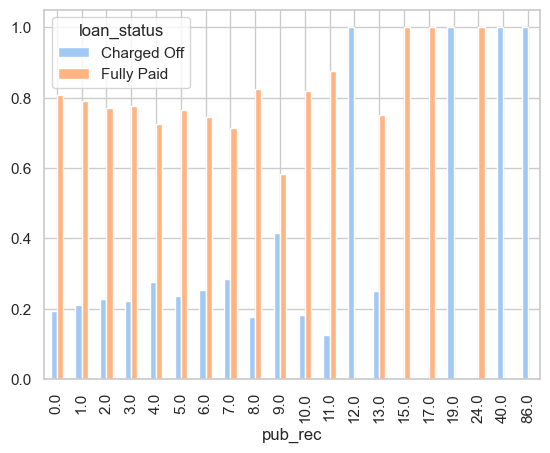

In [69]:
pd.crosstab(index = df["pub_rec"],
            columns= df["loan_status"],normalize= "index", margins = True)*100
pd.crosstab(index = df["pub_rec"],
            columns= df["loan_status"],normalize= "index").plot(kind = "bar");


#### `revol_bal`

In [70]:
df.groupby("loan_status")["revol_bal"].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15390.454701,18203.387930,0.0,6150.0,11277.0,19485.0,1030826.0
Fully Paid,318357.0,15955.327918,21132.193457,0.0,5992.0,11158.0,19657.0,1743266.0


<Axes: xlabel='revol_bal', ylabel='Count'>

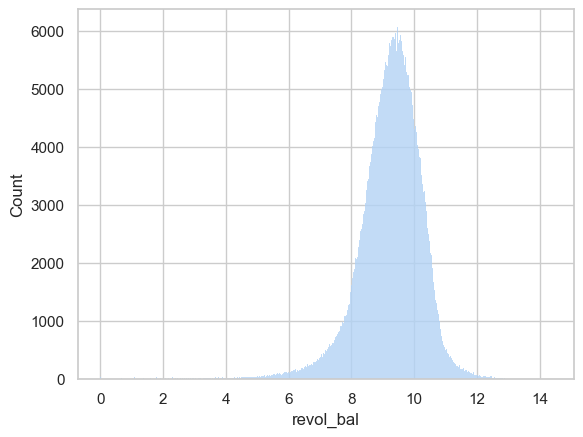

In [71]:
sns.histplot(np.log(df["revol_bal"]))

<Axes: xlabel='loan_status', ylabel='revol_bal'>

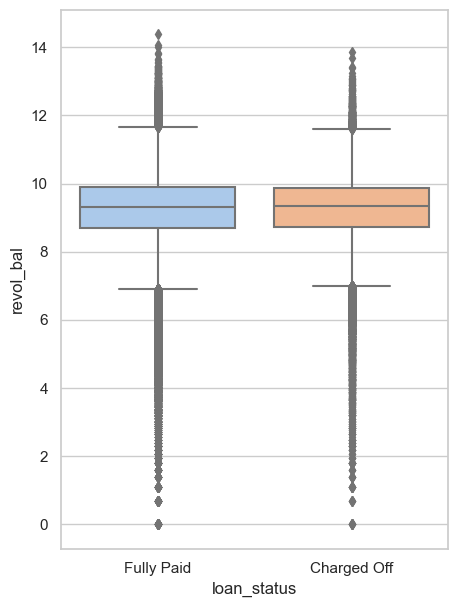

In [72]:
plt.figure(figsize=(5,7))
sns.boxplot(y= np.log(df["revol_bal"]),
            x=df["loan_status"])

#### `revol_util`

In [73]:
df.groupby("loan_status")["revol_util"].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77610.0,57.869824,23.492176,0.0,41.2,59.3,76.2,148.0
Fully Paid,318144.0,52.796918,24.578304,0.0,34.6,53.7,72.0,892.3


<Axes: xlabel='loan_status', ylabel='revol_util'>

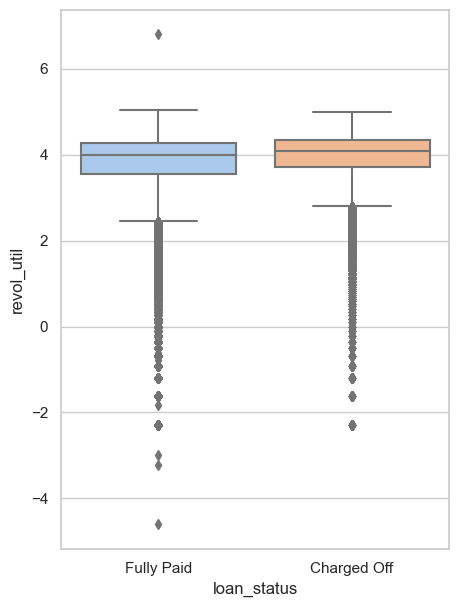

In [74]:
plt.figure(figsize=(5,7))
sns.boxplot(y= np.log(df["revol_util"]),
            x=df["loan_status"])

#### `Address`

In [75]:
df["address"][15]

'11629 Sean Hills Suite 614\r\nStevenfort, HI 30723'

In [76]:
df["address"] = df["address"].str.split().apply(lambda x:x[-1])

In [77]:
df["address"][15]

'30723'

In [78]:
df["address"].value_counts()

address
70466    56985
30723    56546
22690    56527
48052    55917
00813    45824
29597    45471
05113    45402
11650    11226
93700    11151
86630    10981
Name: count, dtype: int64

<Axes: xlabel='address'>

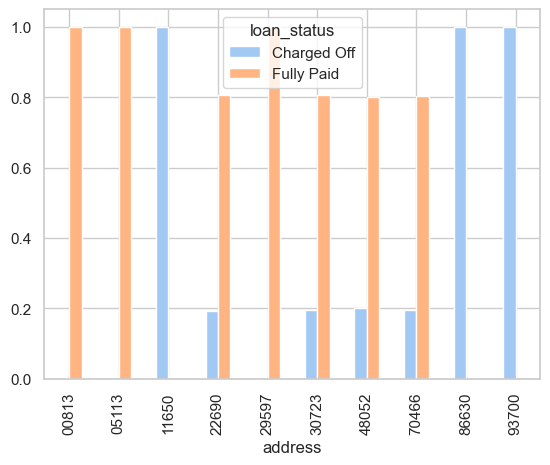

In [79]:
pd.crosstab(index = df["address"],
            columns= df["loan_status"],normalize= "index").plot(kind = "bar")


In [80]:
df["emp_title"].value_counts(dropna=False).sort_values(ascending=False).head(15)


emp_title
NaN                 22927
Teacher              4389
Manager              4250
Registered Nurse     1856
RN                   1846
Supervisor           1830
Sales                1638
Project Manager      1505
Owner                1410
Driver               1339
Office Manager       1218
manager              1145
Director             1089
General Manager      1074
Engineer              995
Name: count, dtype: int64

#### `home_ownership`

In [81]:
df["emp_title"].value_counts(dropna=False).sort_values(ascending=False).head(15)

emp_title
NaN                 22927
Teacher              4389
Manager              4250
Registered Nurse     1856
RN                   1846
Supervisor           1830
Sales                1638
Project Manager      1505
Owner                1410
Driver               1339
Office Manager       1218
manager              1145
Director             1089
General Manager      1074
Engineer              995
Name: count, dtype: int64

In [82]:
df["emp_title"].nunique()

173105

#### `emp_length`

In [83]:
df["emp_length"].value_counts(dropna=False)


emp_length
10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
NaN           18301
9 years       15314
Name: count, dtype: int64

<Axes: xlabel='emp_length'>

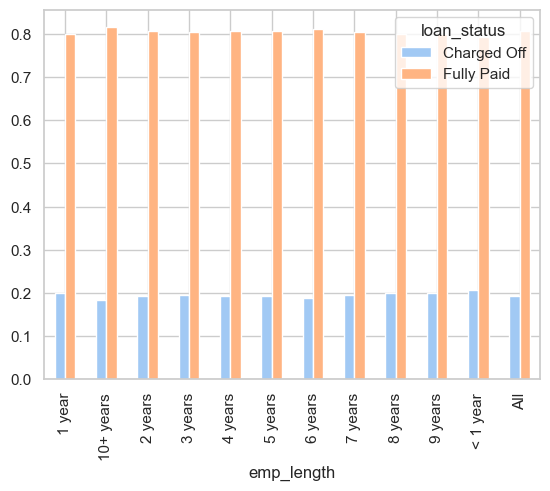

In [84]:
pd.crosstab(index = df["emp_length"],
            columns= df["loan_status"],normalize= "index", margins = True).plot(kind = "bar")

In [85]:
from scipy import stats

In [86]:
stats.chi2_contingency(pd.crosstab(index = df["emp_length"],
            columns= df["loan_status"]))

Chi2ContingencyResult(statistic=122.11317384460878, pvalue=1.88404995201913e-21, dof=10, expected_freq=array([[  4976.95191526,  20905.04808474],
       [ 24236.9212716 , 101804.0787284 ],
       [  6889.31521011,  28937.68478989],
       [  6088.98780607,  25576.01219393],
       [  4605.82459912,  19346.17540088],
       [  5094.82810428,  21400.17189572],
       [  4007.59813252,  16833.40186748],
       [  4003.36766571,  16815.63233429],
       [  3685.89036055,  15482.10963945],
       [  2944.78949194,  12369.21050806],
       [  6100.52544284,  25624.47455716]]))

### `home_ownership`

In [87]:
df["home_ownership"].value_counts(dropna=False)

home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          146
Name: count, dtype: int64

In [88]:
df["home_ownership"] = df["home_ownership"].replace({"NONE":"OTHER", "ANY":"OTHER"})

In [89]:
pd.crosstab(index = df["home_ownership"],
            columns= df["loan_status"],normalize= "index", margins = True)*100

loan_status,Charged Off,Fully Paid
home_ownership,,
MORTGAGE,16.956057,83.043943
OTHER,15.753425,84.246575
OWN,20.680337,79.319663
RENT,22.662244,77.337756
All,19.612908,80.387092


<Axes: xlabel='home_ownership'>

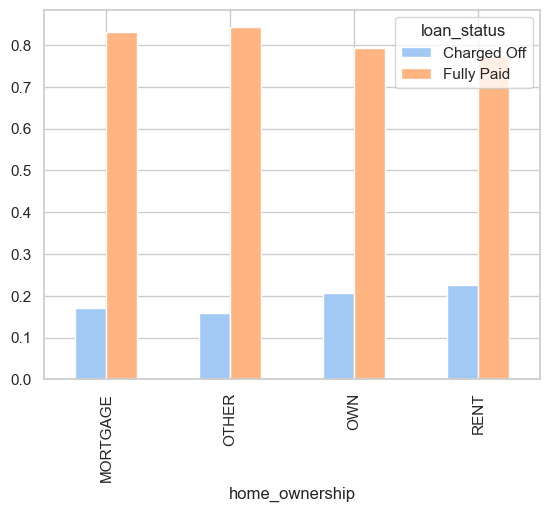

In [90]:
pd.crosstab(index = df["home_ownership"],
            columns= df["loan_status"],normalize= "index").plot(kind= "bar")

#### `annual_inc`

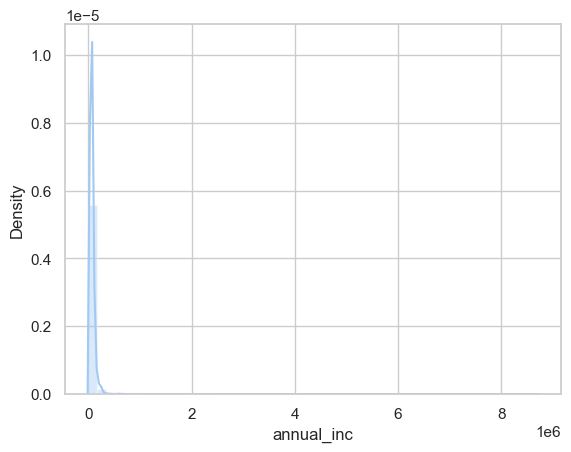

In [91]:
sns.distplot(df["annual_inc"]);

In [92]:
df["annual_inc"].describe()

count    3.960300e+05
mean     7.420318e+04
std      6.163762e+04
min      0.000000e+00
25%      4.500000e+04
50%      6.400000e+04
75%      9.000000e+04
max      8.706582e+06
Name: annual_inc, dtype: float64

<Axes: xlabel='annual_inc', ylabel='Density'>

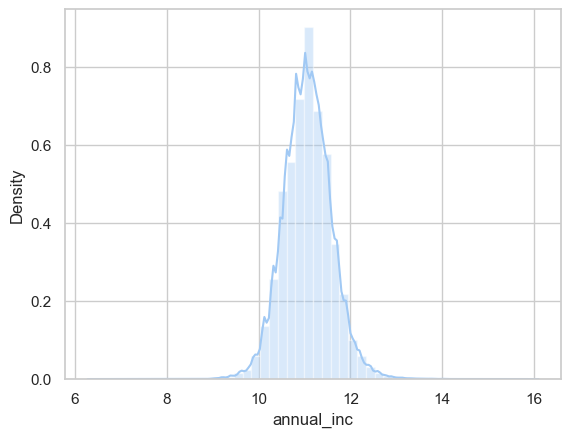

In [93]:
sns.distplot(np.log(df[df["annual_inc"]>0]["annual_inc"]))

<Axes: xlabel='loan_status', ylabel='annual_inc'>

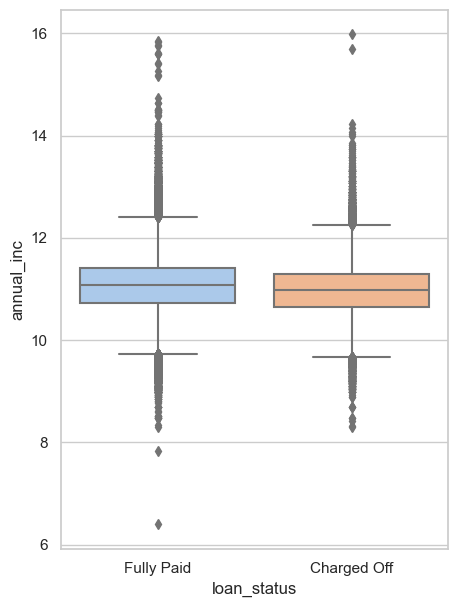

In [94]:
plt.figure(figsize=(5,7))
sns.boxplot(y=np.log(df[df["annual_inc"]>0]["annual_inc"]),
            x=df["loan_status"])

#### `verification_status`

In [95]:
df["verification_status"].value_counts(dropna=False)

verification_status
Verified           139563
Source Verified    131385
Not Verified       125082
Name: count, dtype: int64

In [96]:
pd.crosstab(index = df["verification_status"],
            columns= df["loan_status"],normalize= "index", margins = True)*100

loan_status,Charged Off,Fully Paid
verification_status,,
Not Verified,14.635999,85.364001
Source Verified,21.474293,78.525707
Verified,22.321102,77.678898
All,19.612908,80.387092


<Axes: xlabel='verification_status'>

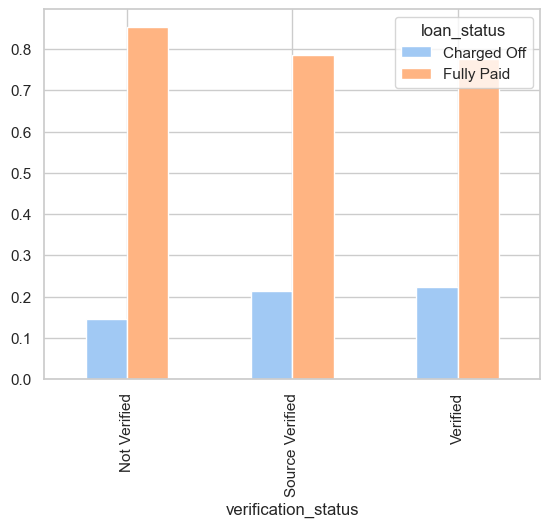

In [97]:
pd.crosstab(index = df["verification_status"],
            columns= df["loan_status"],normalize= "index").plot(kind = "bar")

#### `purpose`

In [98]:
df["purpose"].nunique()

14

purpose
debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         329
educational              257
Name: count, dtype: int64


<Axes: xlabel='purpose'>

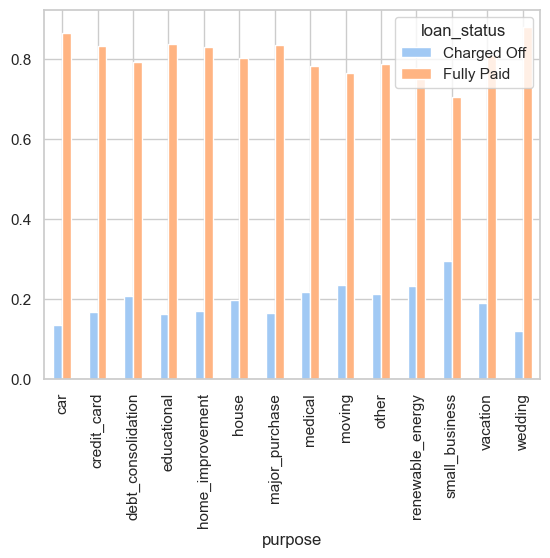

In [99]:
print(df["purpose"].value_counts(dropna=False))
pd.crosstab(index = df["purpose"],
            columns= df["loan_status"],normalize= "index", margins = True)*100
pd.crosstab(index = df["purpose"],
            columns= df["loan_status"],normalize= "index").plot(kind = "bar")


<Axes: xlabel='purpose'>

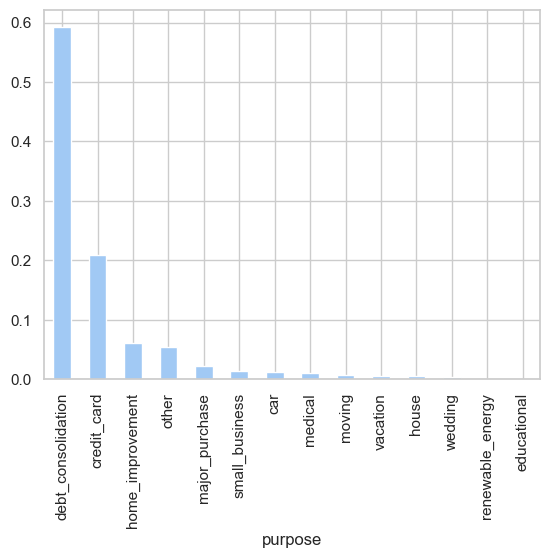

In [100]:
(df["purpose"].value_counts(dropna=False,normalize=True)).plot(kind = "bar")


#### `title`

In [101]:
df["title"].nunique()

48816

In [102]:
df["title"]

0                        Vacation
1              Debt consolidation
2         Credit card refinancing
3         Credit card refinancing
4           Credit Card Refinance
                   ...           
396025         Debt consolidation
396026         Debt consolidation
396027       pay off credit cards
396028              Loanforpayoff
396029          Toxic Debt Payoff
Name: title, Length: 396030, dtype: object

#### `dti`

In [103]:
df["dti"].describe()

count    396030.000000
mean         17.379514
std          18.019092
min           0.000000
25%          11.280000
50%          16.910000
75%          22.980000
max        9999.000000
Name: dti, dtype: float64

<Axes: >

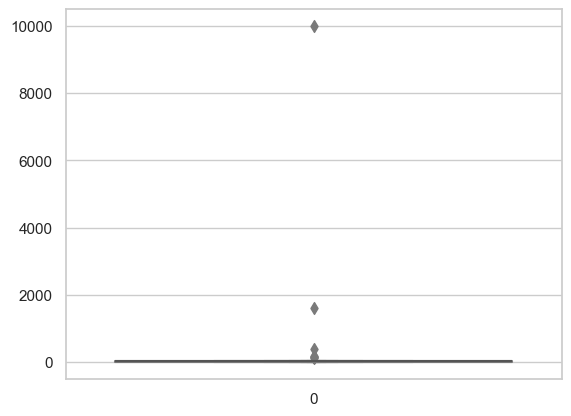

In [104]:
sns.boxenplot((df["dti"]))

<Axes: xlabel='loan_status', ylabel='dti'>

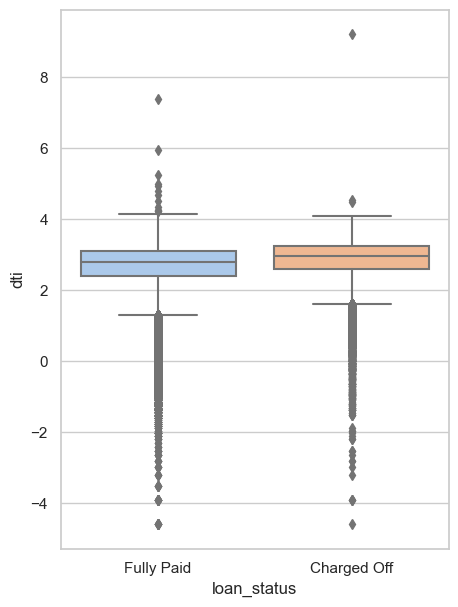

In [105]:
plt.figure(figsize=(5,7))
sns.boxplot(y=np.log(df[df["dti"]>0]["dti"]),
            x=df["loan_status"])

#### `issue_d`

In [106]:
df["issue_d"].value_counts(dropna=False)

issue_d
Oct-2014    14846
Jul-2014    12609
Jan-2015    11705
Dec-2013    10618
Nov-2013    10496
            ...  
Jul-2007       26
Sep-2008       25
Nov-2007       22
Sep-2007       15
Jun-2007        1
Name: count, Length: 115, dtype: int64

#### `earliest_cr_line`

In [107]:
df["Loan_Tenure"] = ((pd.to_datetime(df["issue_d"]) -pd.to_datetime(df["earliest_cr_line"]))/np.timedelta64(1, 'M'))

<Axes: ylabel='Count'>

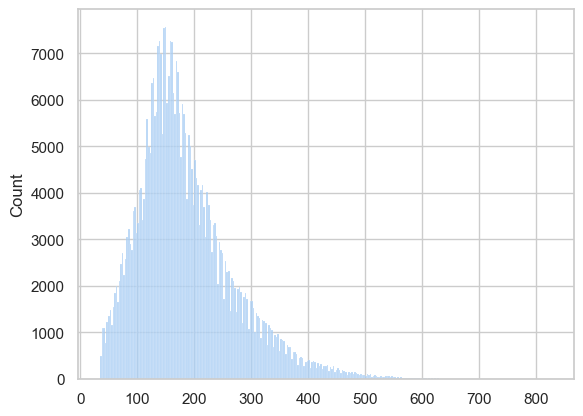

In [108]:
 sns.histplot(((pd.to_datetime(df["issue_d"]) -pd.to_datetime(df["earliest_cr_line"]))/np.timedelta64(1, 'M')))

<Axes: xlabel='loan_status'>

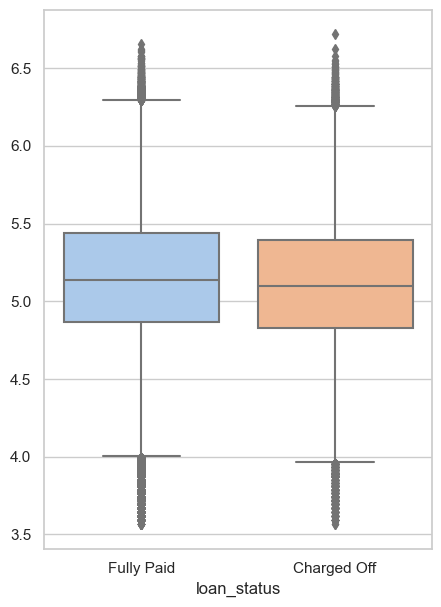

In [109]:
plt.figure(figsize=(5,7))
sns.boxplot(y=np.log(((pd.to_datetime(df["issue_d"]) -pd.to_datetime(df["earliest_cr_line"]))/np.timedelta64(1, 'M'))),
            x=df["loan_status"])

#### `open_acc1

In [110]:
df.groupby("loan_status")["open_acc"].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,11.602513,5.288507,0.0,8.0,11.0,14.0,76.0
Fully Paid,318357.0,11.240067,5.097647,0.0,8.0,10.0,14.0,90.0


In [111]:
df["open_acc"].nunique()

61

<Axes: xlabel='open_acc', ylabel='Count'>

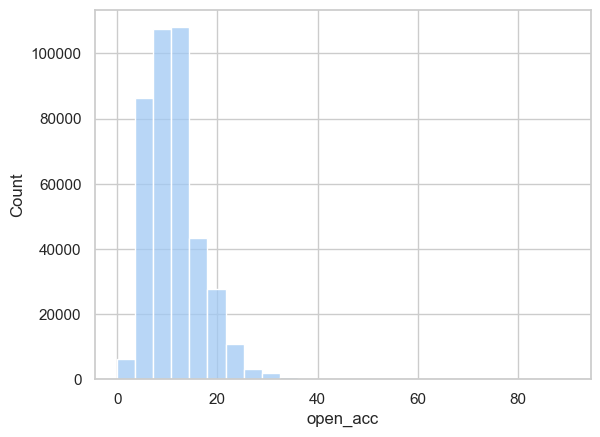

In [112]:
sns.histplot(df["open_acc"],bins = 25)


<Axes: xlabel='loan_status', ylabel='open_acc'>

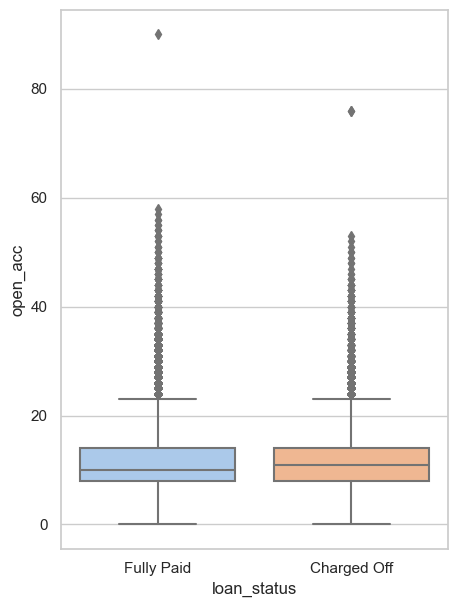

In [113]:
plt.figure(figsize=(5,7))
sns.boxplot(y= df["open_acc"],
            x=df["loan_status"])

#### `pub_rec`

In [114]:
df.groupby("loan_status")["pub_rec"].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,0.199606,0.648283,0.0,0.0,0.0,0.0,86.0
Fully Paid,318357.0,0.172966,0.497637,0.0,0.0,0.0,0.0,24.0


<Axes: xlabel='loan_status', ylabel='pub_rec'>

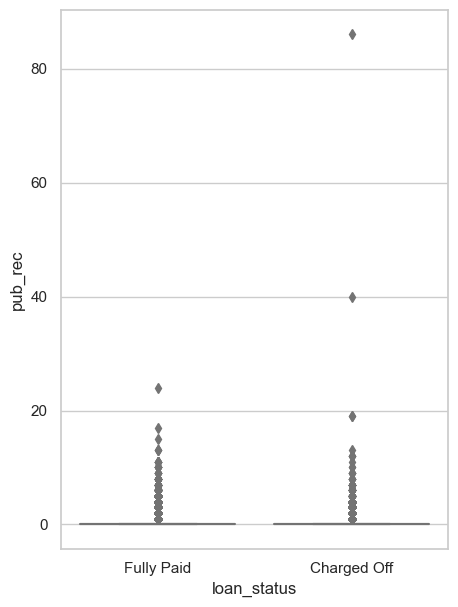

In [115]:
plt.figure(figsize=(5,7))
sns.boxplot(y= df["pub_rec"],
            x=df["loan_status"])

pub_rec
0.0     338272
1.0      49739
2.0       5476
3.0       1521
4.0        527
5.0        237
6.0        122
7.0         56
8.0         34
9.0         12
10.0        11
11.0         8
13.0         4
12.0         4
19.0         2
40.0         1
17.0         1
86.0         1
24.0         1
15.0         1
Name: count, dtype: int64


<Axes: xlabel='pub_rec'>

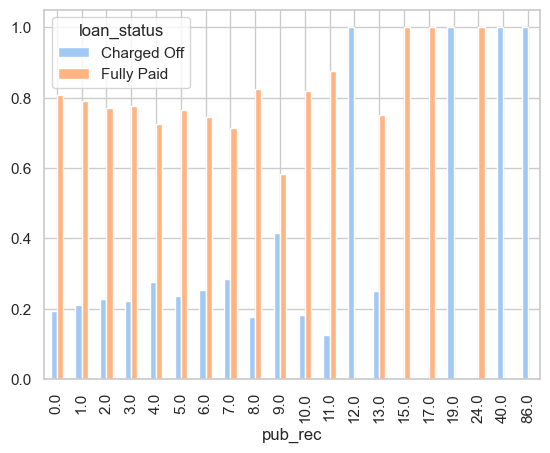

In [116]:
print(df["pub_rec"].value_counts(dropna=False))
pd.crosstab(index = df["pub_rec"],
            columns= df["loan_status"],normalize= "index", margins = True)*100
pd.crosstab(index = df["pub_rec"],
            columns= df["loan_status"],normalize= "index").plot(kind = "bar")


#### `revol_bal`

In [117]:
df.groupby("loan_status")["revol_bal"].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15390.454701,18203.387930,0.0,6150.0,11277.0,19485.0,1030826.0
Fully Paid,318357.0,15955.327918,21132.193457,0.0,5992.0,11158.0,19657.0,1743266.0


<Axes: xlabel='revol_bal', ylabel='Count'>

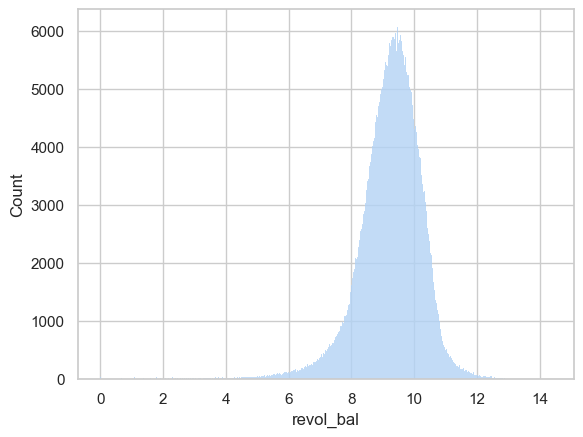

In [118]:
sns.histplot(np.log(df["revol_bal"]))


<Axes: xlabel='loan_status', ylabel='revol_bal'>

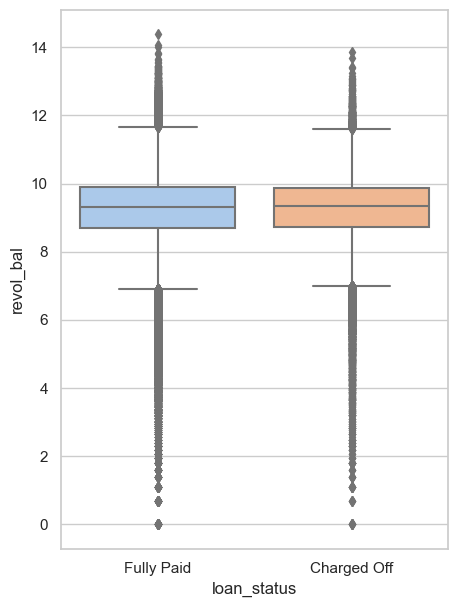

In [119]:
plt.figure(figsize=(5,7))
sns.boxplot(y= np.log(df["revol_bal"]),
            x=df["loan_status"])

#### `revol_util`

In [120]:
df.groupby("loan_status")["revol_util"].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77610.0,57.869824,23.492176,0.0,41.2,59.3,76.2,148.0
Fully Paid,318144.0,52.796918,24.578304,0.0,34.6,53.7,72.0,892.3


<Axes: xlabel='loan_status', ylabel='revol_util'>

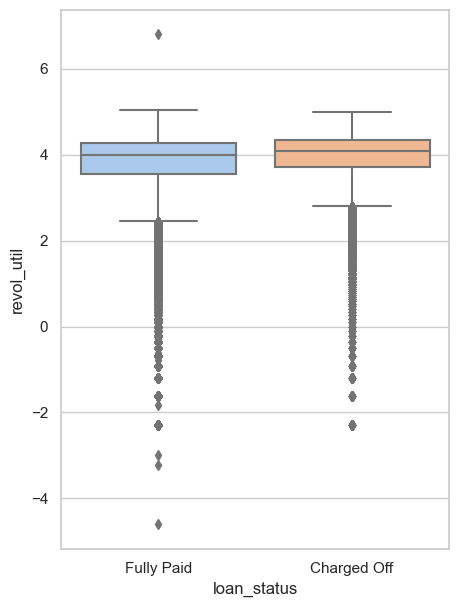

In [121]:
plt.figure(figsize=(5,7))
sns.boxplot(y= np.log(df["revol_util"]),
            x=df["loan_status"])

#### `total_acc`

In [122]:
df["total_acc"].value_counts()

total_acc
21.0     14280
22.0     14260
20.0     14228
23.0     13923
24.0     13878
         ...  
110.0        1
129.0        1
135.0        1
104.0        1
103.0        1
Name: count, Length: 118, dtype: int64

In [123]:
df.groupby("loan_status")["total_acc"].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,24.984152,11.913692,2.0,16.0,23.0,32.0,151.0
Fully Paid,318357.0,25.519800,11.878117,2.0,17.0,24.0,32.0,150.0


<Axes: xlabel='loan_status', ylabel='total_acc'>

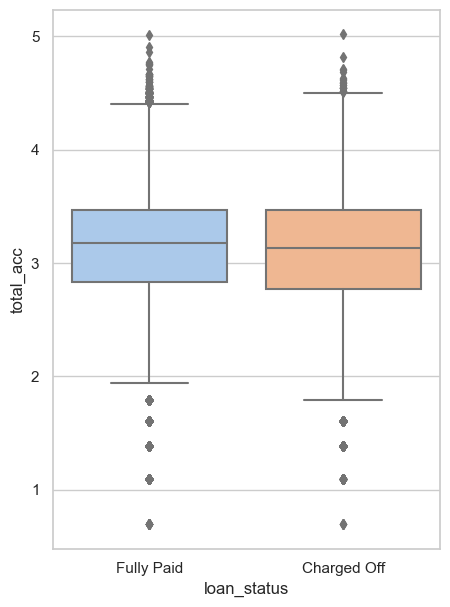

In [124]:
plt.figure(figsize=(5,7))
sns.boxplot(y= np.log(df["total_acc"]),
            x=df["loan_status"])

#### initial_list_status

In [125]:
df["initial_list_status"].value_counts()

initial_list_status
f    238066
w    157964
Name: count, dtype: int64

initial_list_status
f    238066
w    157964
Name: count, dtype: int64


<Axes: xlabel='initial_list_status'>

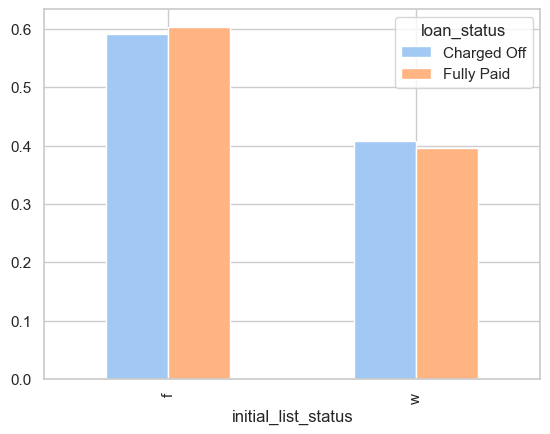

In [126]:
print(df["initial_list_status"].value_counts(dropna=False))

pd.crosstab(index = df["initial_list_status"],
            columns= df["loan_status"],normalize= "columns").plot(kind = "bar")


#### `application_type`

In [127]:
df["application_type"].value_counts()

application_type
INDIVIDUAL    395319
JOINT            425
DIRECT_PAY       286
Name: count, dtype: int64

application_type
INDIVIDUAL    395319
JOINT            425
DIRECT_PAY       286
Name: count, dtype: int64


<Axes: xlabel='application_type'>

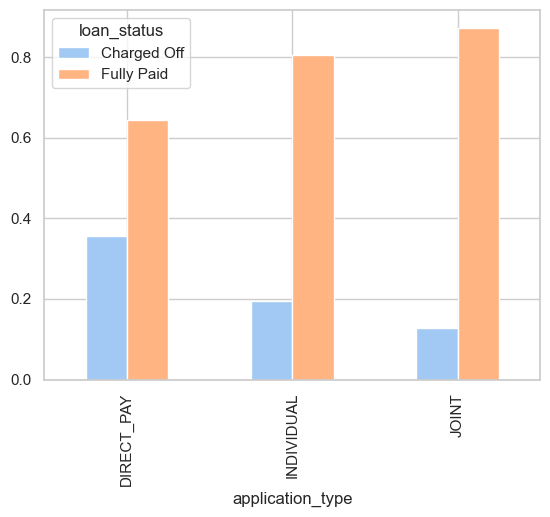

In [128]:
print(df["application_type"].value_counts(dropna=False))

pd.crosstab(index = df["application_type"],
            columns= df["loan_status"],normalize= "index").plot(kind = "bar")


#### `mort_acc`

In [129]:
df.groupby("loan_status")["mort_acc"].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,72123.0,1.501213,1.974353,0.0,0.0,1.0,2.0,23.0
Fully Paid,286112.0,1.892836,2.182456,0.0,0.0,1.0,3.0,34.0


<Axes: xlabel='loan_status', ylabel='mort_acc'>

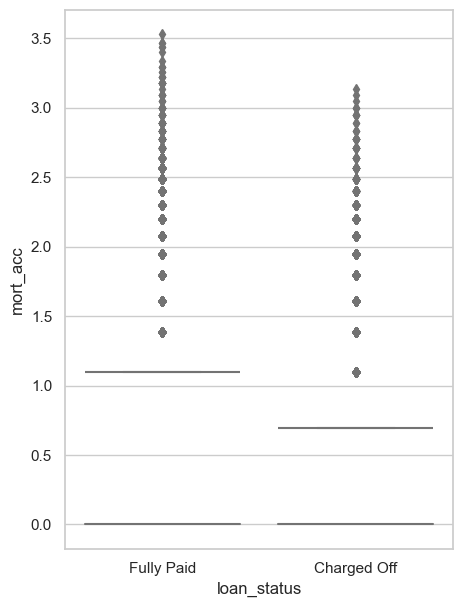

In [130]:
plt.figure(figsize=(5,7))
sns.boxplot(y= np.log(df["mort_acc"]),
            x=df["loan_status"])

<Axes: xlabel='mort_acc'>

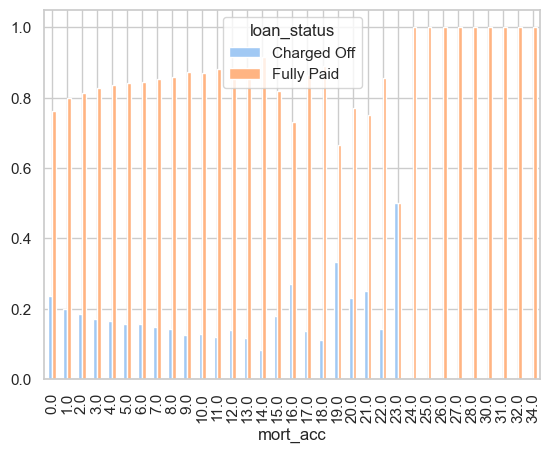

In [131]:
pd.crosstab(index = df["mort_acc"],
            columns= df["loan_status"],normalize= "index").plot(kind = "bar")

#### `pub_rec_bankruptcies`

In [132]:
df["pub_rec_bankruptcies"].value_counts()

pub_rec_bankruptcies
0.0    350380
1.0     42790
2.0      1847
3.0       351
4.0        82
5.0        32
6.0         7
7.0         4
8.0         2
Name: count, dtype: int64

pub_rec_bankruptcies
0.0    350380
1.0     42790
2.0      1847
NaN       535
3.0       351
4.0        82
5.0        32
6.0         7
7.0         4
8.0         2
Name: count, dtype: int64
loan_status           Charged Off  Fully Paid
pub_rec_bankruptcies                         
0.0                     19.499115   80.500885
1.0                     20.394952   79.605048
2.0                     23.226854   76.773146
3.0                     21.082621   78.917379
4.0                     31.707317   68.292683
5.0                     15.625000   84.375000
6.0                     28.571429   71.428571
7.0                     25.000000   75.000000
8.0                     50.000000   50.000000
All                     19.617441   80.382559


<Axes: xlabel='pub_rec_bankruptcies'>

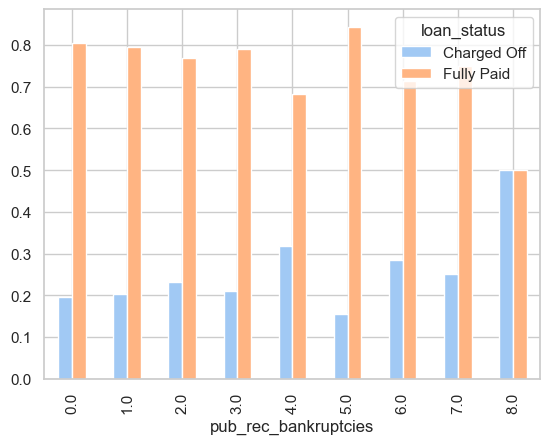

In [133]:
print(df["pub_rec_bankruptcies"].value_counts(dropna=False))
print(pd.crosstab(index = df["pub_rec_bankruptcies"],
            columns= df["loan_status"],normalize= "index", margins = True)*100)
pd.crosstab(index = df["pub_rec_bankruptcies"],
            columns= df["loan_status"],normalize= "index").plot(kind = "bar")


#### `Address`

In [134]:
df["address"] = df["address"].str.split().apply(lambda x:x[-1])

In [135]:
df["address"].value_counts()

address
70466    56985
30723    56546
22690    56527
48052    55917
00813    45824
29597    45471
05113    45402
11650    11226
93700    11151
86630    10981
Name: count, dtype: int64

<Axes: xlabel='address'>

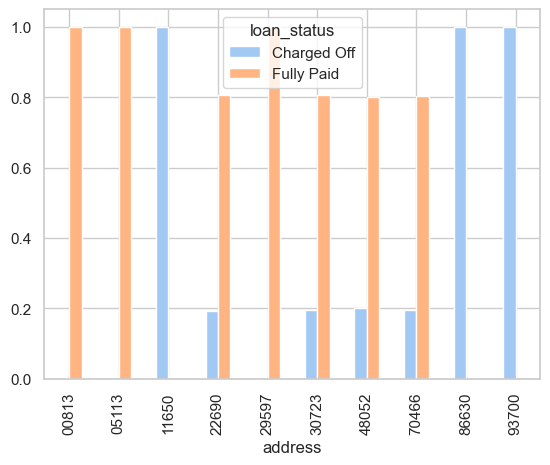

In [136]:
pd.crosstab(index = df["address"],
            columns= df["loan_status"],normalize= "index").plot(kind = "bar")


In [137]:
df["pin_code"] = df["address"]
df.drop(["address"],axis = 1  ,inplace=True)

#### `loan_status` : Target Variable


<Axes: xlabel='loan_status'>

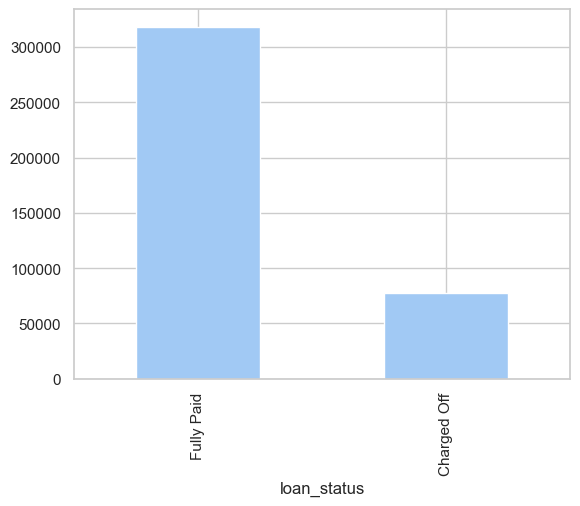

In [138]:
df["loan_status"].value_counts(dropna=False).plot(kind = "bar")


In [139]:
df["loan_status"].value_counts(dropna=False, normalize=True)  * 100

loan_status
Fully Paid     80.387092
Charged Off    19.612908
Name: proportion, dtype: float64

In [140]:
# Imbalanced data. 

# 80% loans are fully paid.
# 20% loans are charged_off 

### Purging `unimportant` features 

In [141]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
Loan_Tenure                 0
pin_code                    0
dtype: int64

In [142]:
df.drop(["title","issue_d","earliest_cr_line","initial_list_status"],axis = 1, inplace=True)

In [143]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,application_type,mort_acc,pub_rec_bankruptcies,Loan_Tenure,pin_code
0,10000.0,36,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,INDIVIDUAL,0.0,0.0,289.677419,22690
1,8000.0,36,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,INDIVIDUAL,3.0,0.0,123.741935,05113
2,15600.0,36,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,INDIVIDUAL,0.0,0.0,87.419355,05113
3,7200.0,36,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,INDIVIDUAL,0.0,0.0,96.225806,00813
4,24375.0,60,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,INDIVIDUAL,1.0,0.0,165.967742,11650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,...,6.0,0.0,1990.0,34.3,23.0,INDIVIDUAL,0.0,0.0,128.580645,30723
396026,21000.0,36,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,...,6.0,0.0,43263.0,95.7,8.0,INDIVIDUAL,1.0,0.0,106.032258,05113
396027,5000.0,36,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,...,15.0,0.0,32704.0,66.9,23.0,INDIVIDUAL,0.0,0.0,195.419355,70466
396028,21000.0,60,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,...,9.0,0.0,15704.0,53.8,20.0,INDIVIDUAL,5.0,0.0,256.258065,29597


In [144]:
missingDF

,percentage of missing data,total
emp_title,5.789208,22927
emp_length,4.621115,18301
title,0.443401,1756
revol_util,0.069692,276
mort_acc,9.543469,37795
pub_rec_bankruptcies,0.135091,535


In [145]:
from sklearn.impute import SimpleImputer
Imputer = SimpleImputer(strategy="most_frequent")
df["mort_acc"] = Imputer.fit_transform(df["mort_acc"].values.reshape(-1,1))

In [146]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,application_type,mort_acc,pub_rec_bankruptcies,Loan_Tenure,pin_code
0,10000.0,36,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,INDIVIDUAL,0.0,0.0,289.677419,22690
1,8000.0,36,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,INDIVIDUAL,3.0,0.0,123.741935,05113
2,15600.0,36,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,INDIVIDUAL,0.0,0.0,87.419355,05113
3,7200.0,36,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,INDIVIDUAL,0.0,0.0,96.225806,00813
4,24375.0,60,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,INDIVIDUAL,1.0,0.0,165.967742,11650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,...,6.0,0.0,1990.0,34.3,23.0,INDIVIDUAL,0.0,0.0,128.580645,30723
396026,21000.0,36,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,...,6.0,0.0,43263.0,95.7,8.0,INDIVIDUAL,1.0,0.0,106.032258,05113
396027,5000.0,36,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,...,15.0,0.0,32704.0,66.9,23.0,INDIVIDUAL,0.0,0.0,195.419355,70466
396028,21000.0,60,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,...,9.0,0.0,15704.0,53.8,20.0,INDIVIDUAL,5.0,0.0,256.258065,29597


In [147]:
df.dropna(inplace=True)

In [148]:
df.isna().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
loan_status             0
purpose                 0
dti                     0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
Loan_Tenure             0
pin_code                0
dtype: int64

In [149]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,application_type,mort_acc,pub_rec_bankruptcies,Loan_Tenure,pin_code
0,10000.0,36,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,INDIVIDUAL,0.0,0.0,289.677419,22690
1,8000.0,36,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,INDIVIDUAL,3.0,0.0,123.741935,05113
2,15600.0,36,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,INDIVIDUAL,0.0,0.0,87.419355,05113
3,7200.0,36,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,INDIVIDUAL,0.0,0.0,96.225806,00813
4,24375.0,60,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,INDIVIDUAL,1.0,0.0,165.967742,11650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,...,6.0,0.0,1990.0,34.3,23.0,INDIVIDUAL,0.0,0.0,128.580645,30723
396026,21000.0,36,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,...,6.0,0.0,43263.0,95.7,8.0,INDIVIDUAL,1.0,0.0,106.032258,05113
396027,5000.0,36,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,...,15.0,0.0,32704.0,66.9,23.0,INDIVIDUAL,0.0,0.0,195.419355,70466
396028,21000.0,60,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,...,9.0,0.0,15704.0,53.8,20.0,INDIVIDUAL,5.0,0.0,256.258065,29597


In [150]:
# from sklearn.impute import SimpleImputer
# Imputer = SimpleImputer(strategy="most_frequent")
# df["mort_acc"] = Imputer.fit_transform(df["mort_acc"].values.reshape(-1,1))

In [151]:
# df.dropna(inplace=True)

In [152]:
# df["Loan_Tenure"] = ((pd.to_datetime(df["issue_d"]) -pd.to_datetime(df["earliest_cr_line"]))/np.timedelta64(1, 'M'))

In [153]:
# df.dropna(inplace=True)

## Data pre-processing and feature engineering

In [154]:
from sklearn.preprocessing import TargetEncoder

In [155]:
TE = TargetEncoder()

In [156]:
df["loan_status"].replace({"Fully Paid":0,
                          "Charged Off" : 1},inplace=True)

In [157]:
df.sample(5)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,application_type,mort_acc,pub_rec_bankruptcies,Loan_Tenure,pin_code
275276,4700.0,36,13.99,160.62,C,C4,Director,10+ years,MORTGAGE,73000.0,...,11.0,0.0,190.0,1.3,38.0,INDIVIDUAL,2.0,0.0,221.870968,48052
177588,10000.0,36,11.14,328.06,B,B2,US NAVY,10+ years,MORTGAGE,72000.0,...,13.0,0.0,18793.0,72.6,26.0,INDIVIDUAL,1.0,0.0,139.387097,70466
21508,25000.0,36,9.99,806.57,B,B3,Owner,3 years,RENT,60000.0,...,17.0,0.0,24173.0,47.5,25.0,INDIVIDUAL,0.0,0.0,105.032258,70466
185622,5500.0,36,11.99,182.66,B,B3,Loan officer,9 years,MORTGAGE,150000.0,...,12.0,4.0,11017.0,81.0,43.0,INDIVIDUAL,2.0,0.0,313.193548,48052
448,15000.0,36,6.62,460.56,A,A2,Aerotek,< 1 year,MORTGAGE,73000.0,...,12.0,0.0,15352.0,24.1,26.0,INDIVIDUAL,1.0,0.0,220.903226,00813


In [158]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status', 'purpose', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'Loan_Tenure', 'pin_code'],
      dtype='object')

In [159]:
target_enc = ["sub_grade","grade",'term', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'purpose', 'application_type']

In [160]:
for col in target_enc:
    from category_encoders import TargetEncoder
    TEncoder = TargetEncoder()
    
    df[col] = TEncoder.fit_transform(df[col],df["loan_status"])

In [161]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,application_type,mort_acc,pub_rec_bankruptcies,Loan_Tenure,pin_code
0,10000.0,36,11.44,329.48,0.121856,0.134935,0.247136,0.184208,0.222392,117000.0,...,16.0,0.0,36369.0,41.8,25.0,0.1922,0.0,0.0,289.677419,22690
1,8000.0,36,11.99,265.68,0.121856,0.150496,0.214018,0.191896,0.166495,65000.0,...,17.0,0.0,20131.0,53.3,27.0,0.1922,3.0,0.0,123.741935,05113
2,15600.0,36,10.49,506.97,0.121856,0.119644,0.189214,0.206840,0.222392,43057.0,...,13.0,0.0,11987.0,92.2,26.0,0.1922,0.0,0.0,87.419355,05113
3,7200.0,36,6.49,220.65,0.059785,0.044741,0.167211,0.189319,0.222392,54000.0,...,6.0,0.0,5472.0,21.5,13.0,0.1922,0.0,0.0,96.225806,00813
4,24375.0,60,17.27,609.33,0.207325,0.239437,0.297320,0.200951,0.166495,55000.0,...,13.0,0.0,24584.0,69.8,43.0,0.1922,1.0,0.0,165.967742,11650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,0.121856,0.134935,0.167211,0.193219,0.222392,40000.0,...,6.0,0.0,1990.0,34.3,23.0,0.1922,0.0,0.0,128.580645,30723
396026,21000.0,36,12.29,700.42,0.207325,0.168489,0.220430,0.191915,0.166495,110000.0,...,6.0,0.0,43263.0,95.7,8.0,0.1922,1.0,0.0,106.032258,05113
396027,5000.0,36,9.99,161.32,0.121856,0.094672,0.267968,0.184208,0.222392,56500.0,...,15.0,0.0,32704.0,66.9,23.0,0.1922,0.0,0.0,195.419355,70466
396028,21000.0,60,15.31,503.02,0.207325,0.192642,0.167211,0.184208,0.166495,64000.0,...,9.0,0.0,15704.0,53.8,20.0,0.1922,5.0,0.0,256.258065,29597


## Detecting `outliers`

In [162]:
def outlier_remover(a,df):

    q1 = a.quantile(.25)
    q3 = a.quantile(.75)
    iqr = q3 - q1

    maxx = q3 + 1.5 * iqr
    minn = q1 - 1.5 * iqr

    return df.loc[(a>=minn) & (a<=maxx)]

In [163]:
floats = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'open_acc','revol_bal', 'revol_util', 'total_acc']


In [164]:
for i in floats:
    df = outlier_remover(df[i],df)

In [165]:
df.sample(3)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,application_type,mort_acc,pub_rec_bankruptcies,Loan_Tenure,pin_code
262687,24625.0,60,20.20,655.16,0.371029,0.377778,0.235879,0.194577,0.166495,65000.0,...,12.0,0.0,27592.0,89.0,20.0,0.1922,1.0,0.0,121.774194,05113
215135,1800.0,36,12.42,60.15,0.121856,0.134935,0.157155,0.194577,0.222392,117000.0,...,5.0,0.0,11180.0,60.8,34.0,0.1922,0.0,0.0,139.387097,48052
110458,23000.0,36,14.30,789.45,0.207325,0.168489,0.179223,0.191915,0.166495,130000.0,...,23.0,0.0,32591.0,45.2,48.0,0.1922,5.0,0.0,217.032258,70466


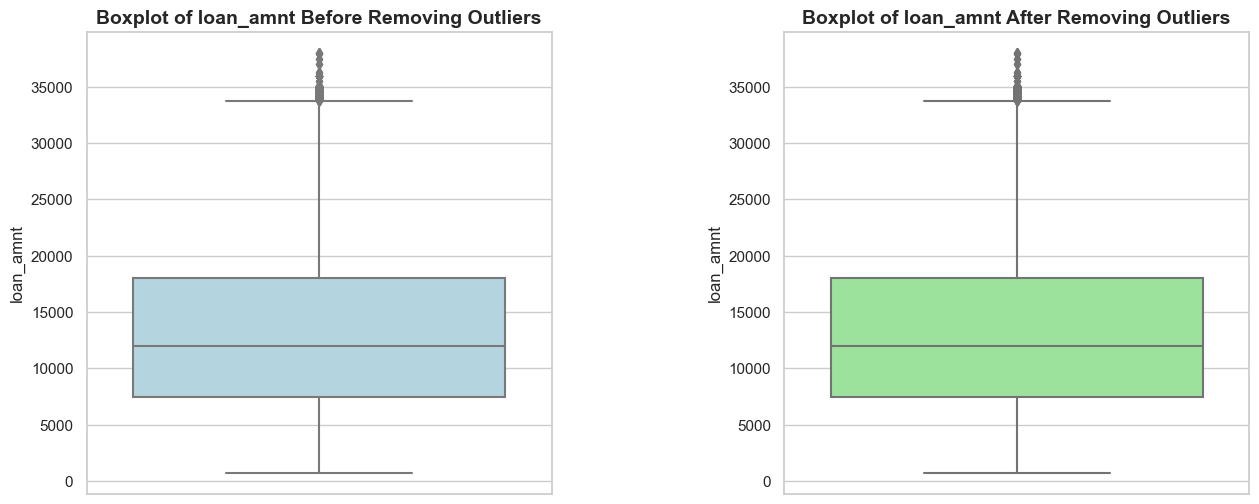

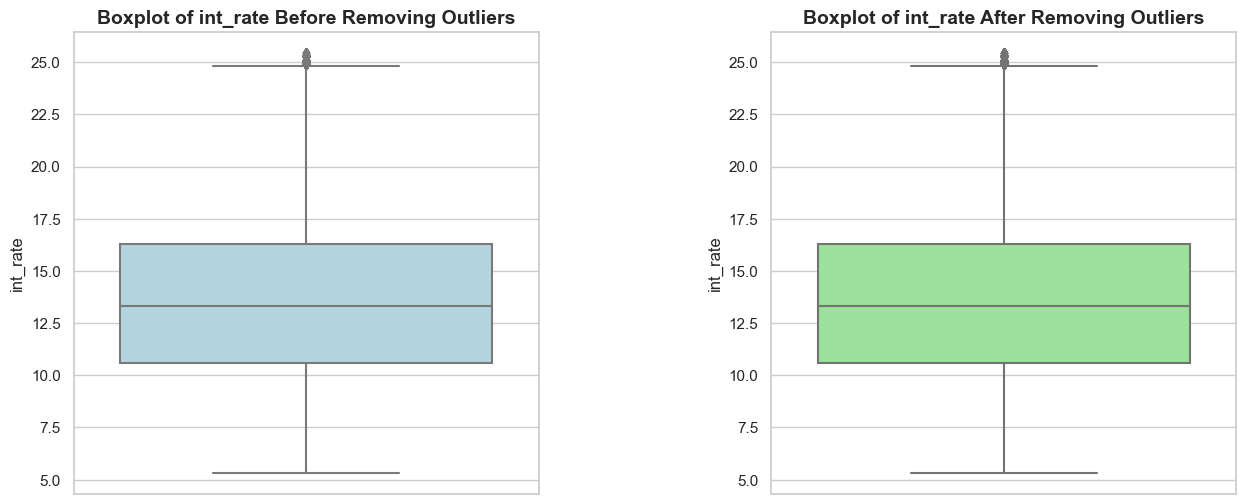

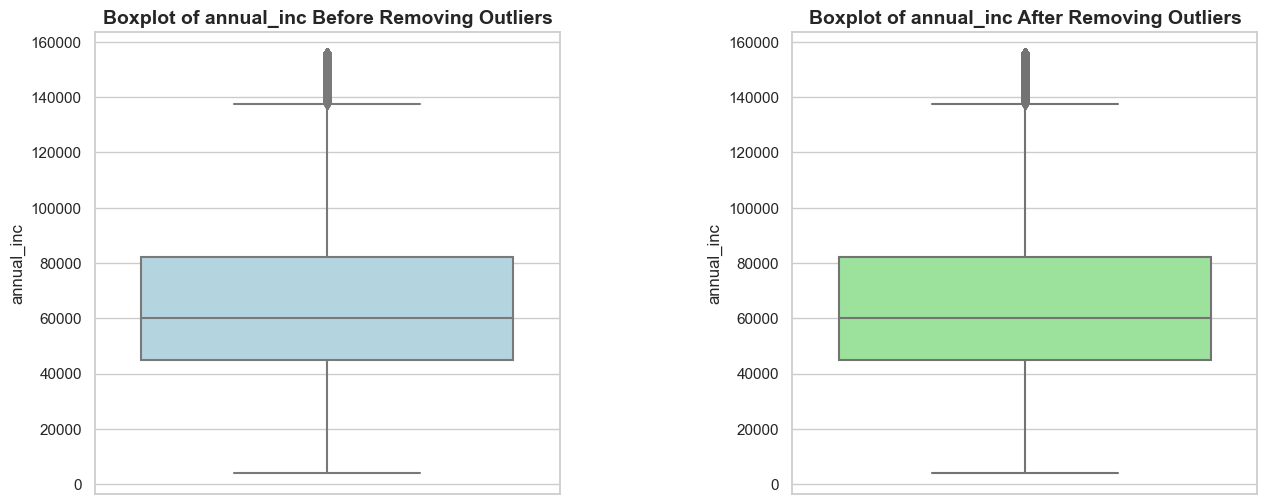

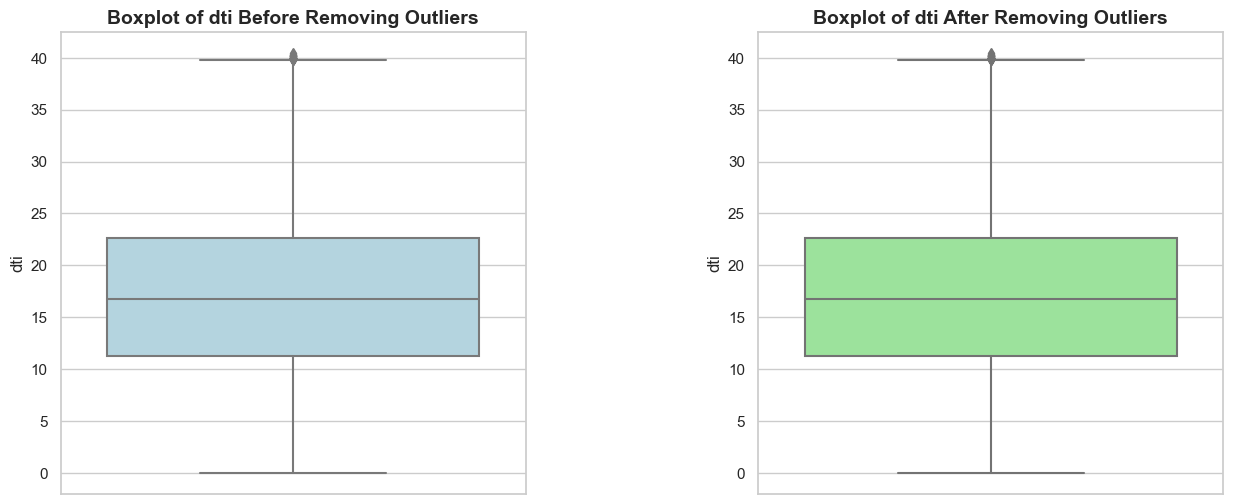

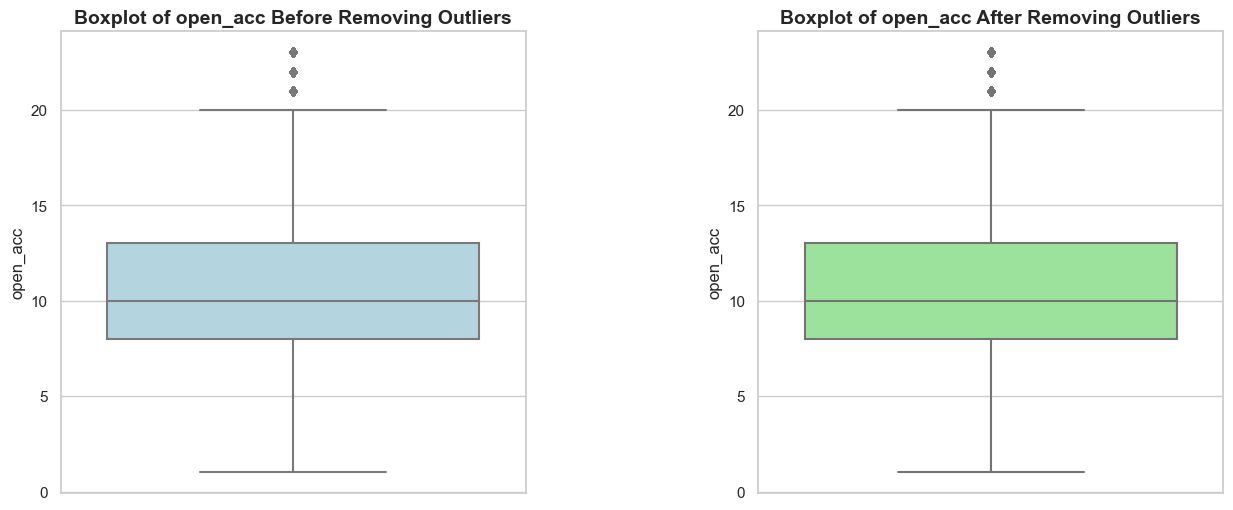

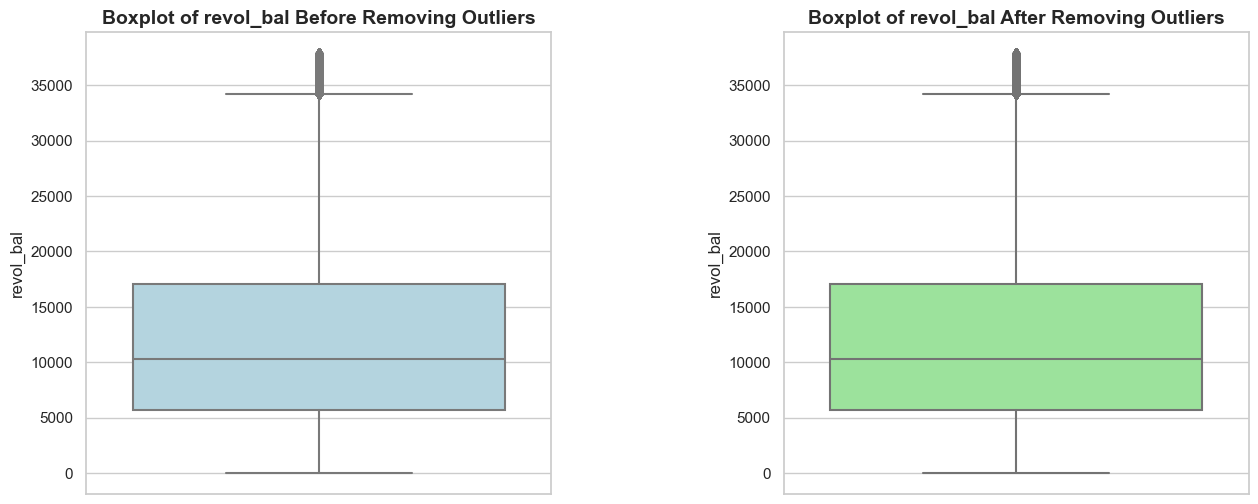

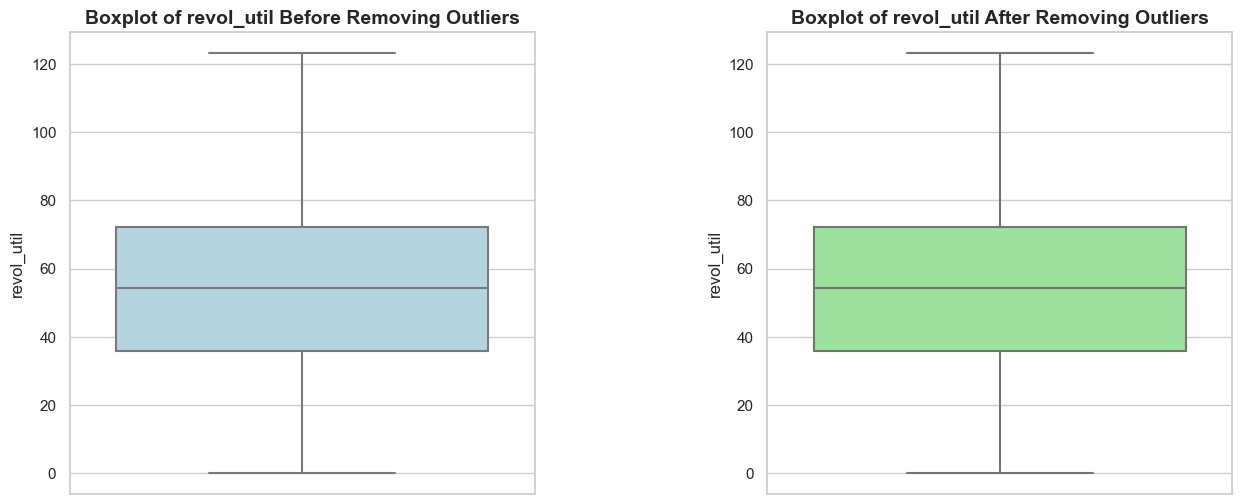

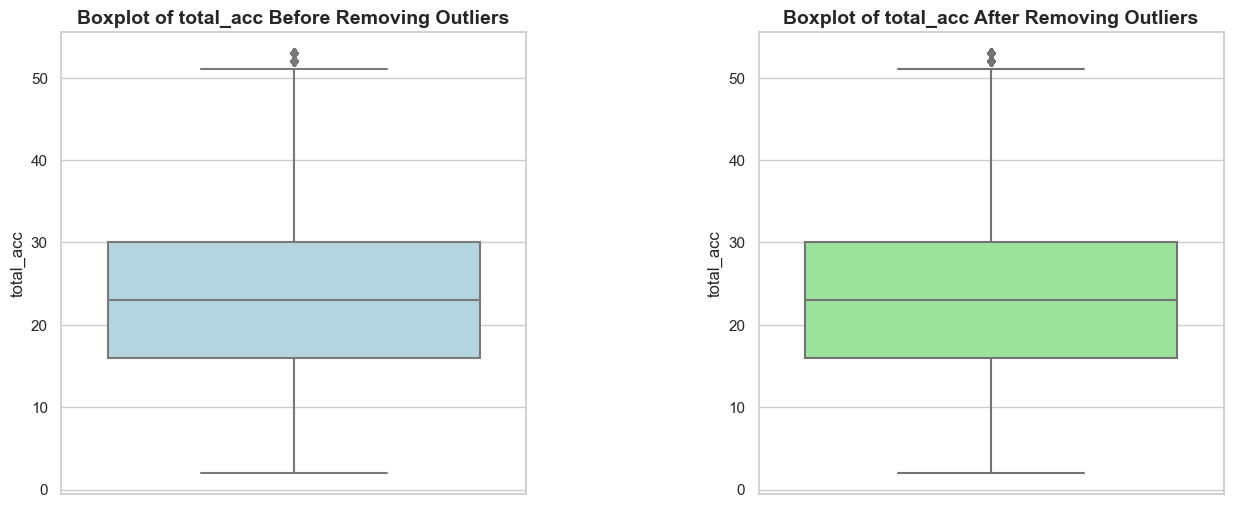

In [166]:
import matplotlib.pyplot as plt
import seaborn as sns

floats = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'open_acc','revol_bal', 'revol_util', 'total_acc']

for i in floats:
    plt.figure(figsize=(15, 6))
    plt.subplots_adjust(wspace=0.5)  # Adjust space between plots

    # Boxplot before removing outliers
    plt.subplot(121)
    sns.boxplot(y=df[i], color="lightblue")  # Custom color
    plt.title(f"Boxplot of {i} Before Removing Outliers", fontsize=14, fontweight='bold')
    plt.ylabel(f"{i}", fontsize=12)

    # Boxplot after removing outliers
    plt.subplot(122)
    sns.boxplot(y=df[i], color="lightgreen")  # Custom color
    plt.title(f"Boxplot of {i} After Removing Outliers", fontsize=14, fontweight='bold')
    plt.ylabel(f"{i}", fontsize=12)

    plt.show()


## Missing value check

In [167]:
def missing_df(data):
    total_missing_df = data.isna().sum().sort_values(ascending = False)
    percentage_missing_df = ((data.isna().sum()/len(data)*100)).sort_values(ascending = False)
    missingDF = pd.concat([total_missing_df, percentage_missing_df],axis = 1, keys=['Total', 'Percent'])
    return missingDF


missing_data = missing_df(df)
missing_data[missing_data["Total"]>0]


,Total,Percent


In [168]:
df.drop(["mort_acc","pub_rec_bankruptcies"],axis = 1 , inplace=True)

In [169]:
df.drop(["pub_rec"],axis = 1 , inplace=True)

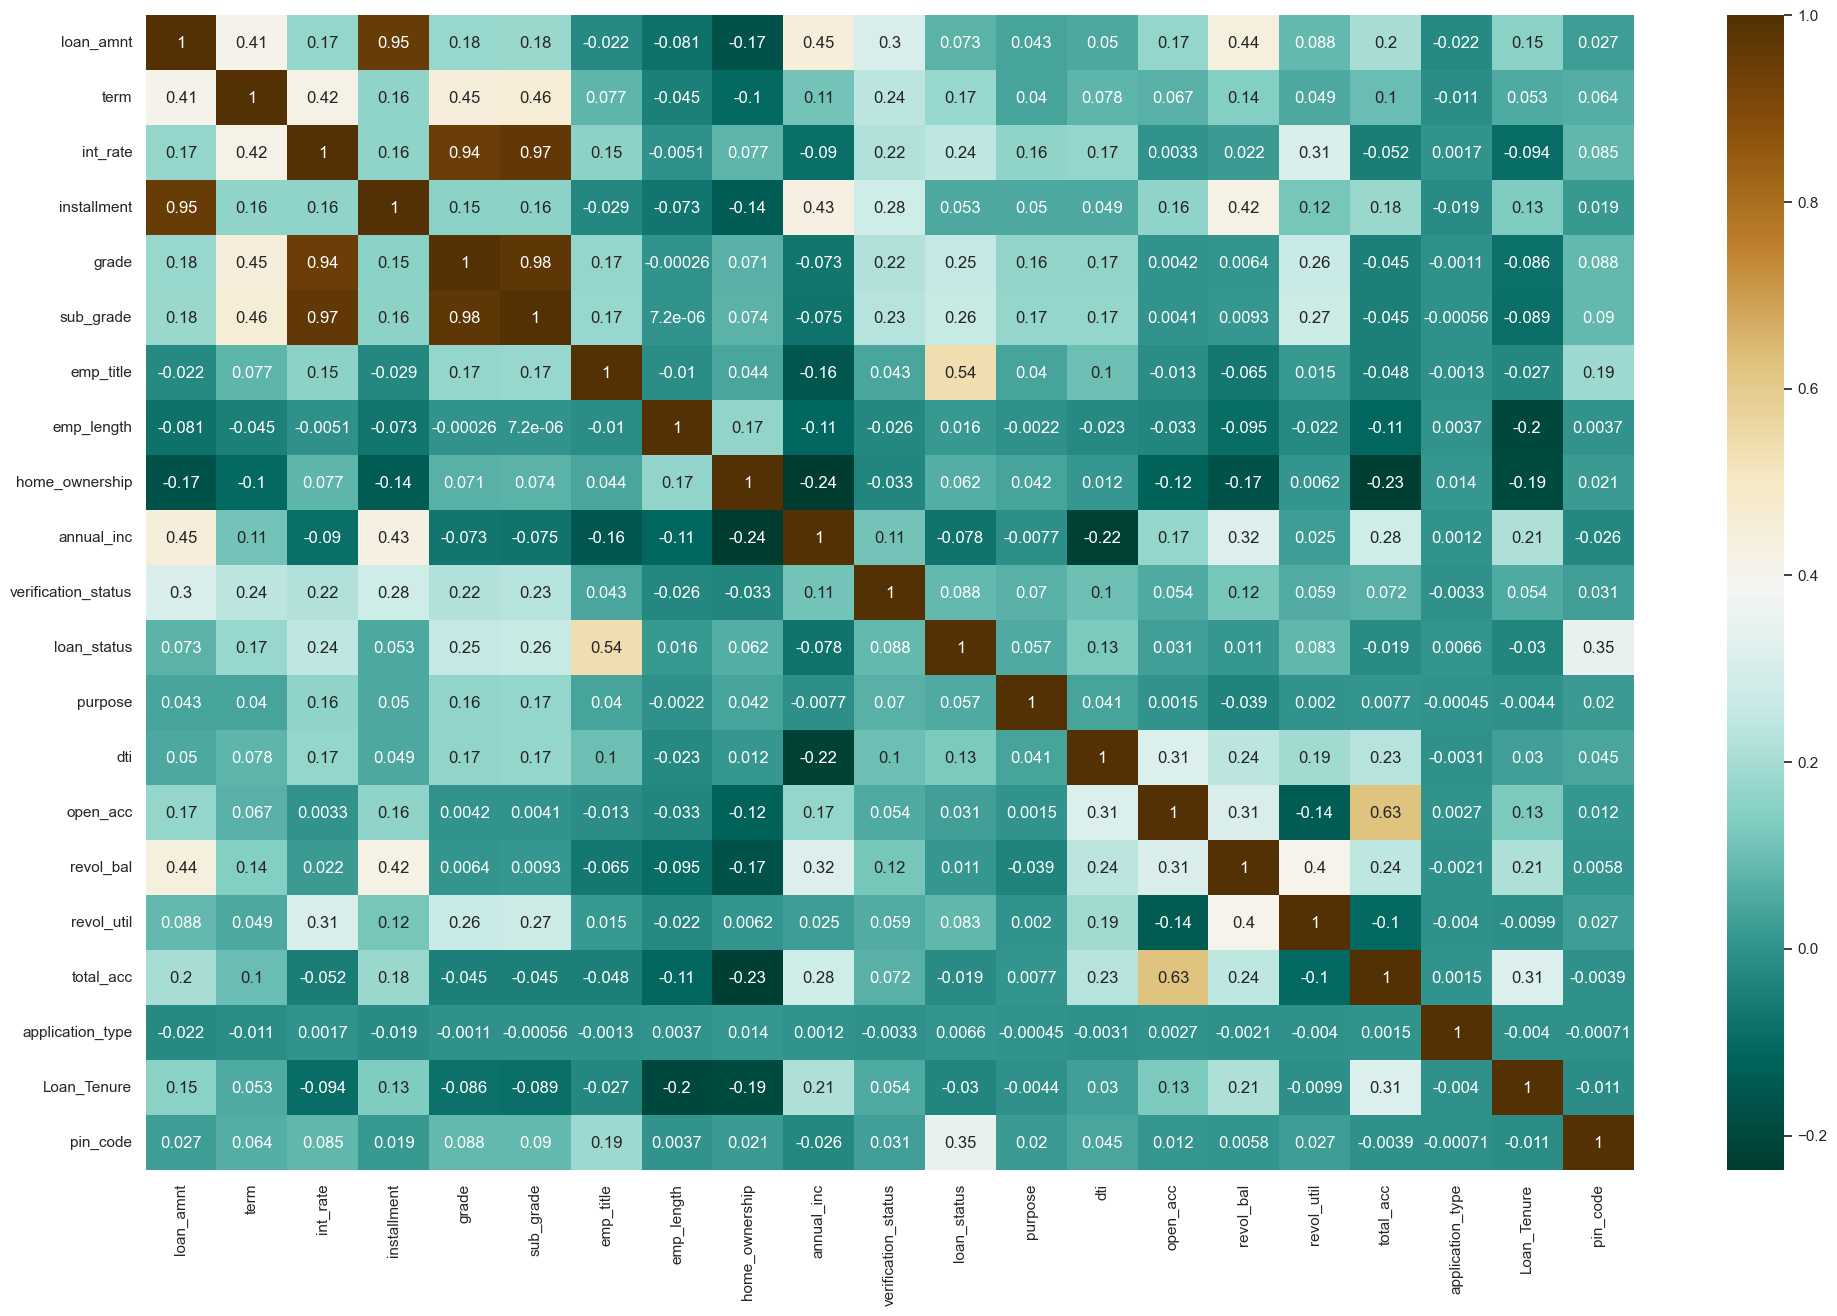

In [170]:
plt.figure(figsize=(24,15))
sns.heatmap(df.corr(),annot=True,cmap='BrBG_r')

plt.show()

## Training the `Logistic Regresion` Model

In [171]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, recall_score, precision_score

### Splitting the data

In [172]:
X = df.drop(["loan_status"],axis = 1)
y = df["loan_status"]

In [173]:
X_train , X_test , y_train , y_test = train_test_split(X,y,
                                                      random_state=3,
                                                      test_size=0.2)

### Logistic Regression on Non-Standardised Data : 

In [174]:
from sklearn.linear_model import LogisticRegression
LR1st = LogisticRegression()

In [175]:
LR1st.fit(X_train,y_train)

LogisticRegression()

In [176]:
LR1st.score(X_test,y_test)

0.82627685038391

In [177]:
from sklearn.metrics import f1_score,recall_score,precision_score

In [178]:
f1_score(y_test,LR1st.predict(X_test))

0.3195129375951294

In [179]:
recall_score(y_test,LR1st.predict(X_test))

0.21221188839466235

In [180]:
precision_score(y_test,LR1st.predict(X_test))

0.6463054187192119

### Standardizing  - preprocessing

In [181]:
from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()

In [182]:
StandardScaler.fit(X_train)

StandardScaler()

### Training the model

In [183]:
X_train = StandardScaler.transform(X_train)
X_test = StandardScaler.transform(X_test)


In [184]:
X_train.shape, X_train.shape

((257350, 20), (257350, 20))

In [185]:
X_train = StandardScaler.transform(X_train)
X_test = StandardScaler.transform(X_test)


In [186]:
from sklearn.linear_model import LogisticRegression
LR_Std = LogisticRegression(C=1.0)
LR_Std.fit(X_train,y_train)

LogisticRegression()

### Model Performance 

In [187]:
print("Accuracy: ",LR_Std.score(X_test,y_test))
print("f1_score: ",f1_score(y_test,LR_Std.predict(X_test)))
print("recall_score: ",recall_score(y_test,LR_Std.predict(X_test)))
print("precision_score: ",precision_score(y_test,LR_Std.predict(X_test)))

Accuracy:  0.8654139077994343
f1_score:  0.6012433801519688
recall_score:  0.5279417711281844
precision_score:  0.6981818181818182


In [188]:
pd.DataFrame(data=LR_Std.coef_,columns=X.columns).T

,0
loan_amnt,-0.023130
term,0.147336
int_rate,-0.018743
installment,-0.018685
grade,-0.025313
sub_grade,0.082948
emp_title,0.073670
emp_length,0.000315
home_ownership,0.002980
annual_inc,-0.031278


<Axes: >

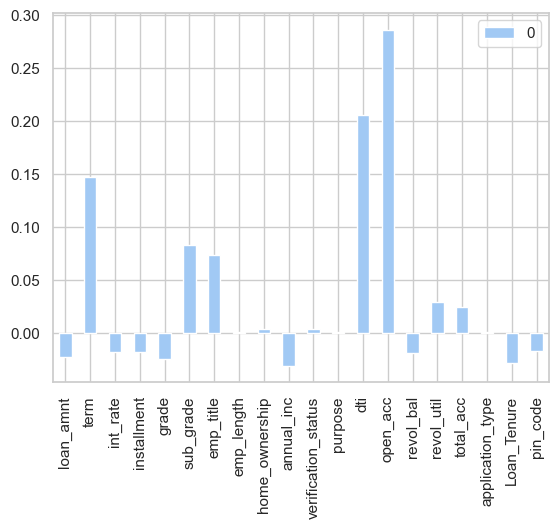

In [189]:
pd.DataFrame(data=LR_Std.coef_,columns=X.columns).T.plot(kind = "bar")

In [190]:
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression(max_iter=1000,class_weight="balanced")

In [191]:
LogReg.fit(X= X_train ,y = y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [192]:
LogReg.score(X_test,y_test)

0.8268985669433305

In [193]:
LogReg.coef_.round(2)

array([[-1.23,  2.39, -0.66, -0.93,  0.01,  0.05,  0.08,  0.  ,  0.  ,
        -1.67,  0.  ,  0.  ,  1.52,  0.7 , -1.03,  1.71, -0.84,  0.  ,
        -1.47, -0.93]])

In [194]:
from sklearn.metrics  import confusion_matrix, f1_score, precision_score,recall_score
print(confusion_matrix(y_test, LogReg.predict(X_test)))
print(precision_score(y_test ,LogReg.predict(X_test)))
print(recall_score(y_test ,LogReg.predict(X_test)))
print(f1_score(y_test ,LogReg.predict(X_test)))



[[43409  8564]
 [ 2573  9792]]
0.5334495532795817
0.7919126566922766
0.6374792487223723


In [195]:
LogReg.coef_

array([[-1.23332204e+00,  2.39163728e+00, -6.55731568e-01,
        -9.33555959e-01,  7.79101604e-03,  5.13507260e-02,
         7.99030080e-02,  2.99361038e-04,  3.09199754e-03,
        -1.66661746e+00,  2.87157450e-03,  9.81256902e-04,
         1.51852886e+00,  7.04621614e-01, -1.03093217e+00,
         1.70811257e+00, -8.43940897e-01,  8.93068728e-05,
        -1.46888033e+00, -9.33897746e-01]])

In [196]:
df.drop(["loan_status"], axis = 1).columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'purpose', 'dti', 'open_acc', 'revol_bal',
       'revol_util', 'total_acc', 'application_type', 'Loan_Tenure',
       'pin_code'],
      dtype='object')

In [197]:
feature_importance = pd.DataFrame(index = df.drop(["loan_status"],
                                                  axis = 1).columns,
                                  data = LogReg.coef_.ravel()).reset_index()
feature_importance

,index,0
0,loan_amnt,-1.233322
1,term,2.391637
2,int_rate,-0.655732
3,installment,-0.933556
4,grade,0.007791
5,sub_grade,0.051351
6,emp_title,0.079903
7,emp_length,0.000299
8,home_ownership,0.003092
9,annual_inc,-1.666617


<Axes: xlabel='0', ylabel='index'>

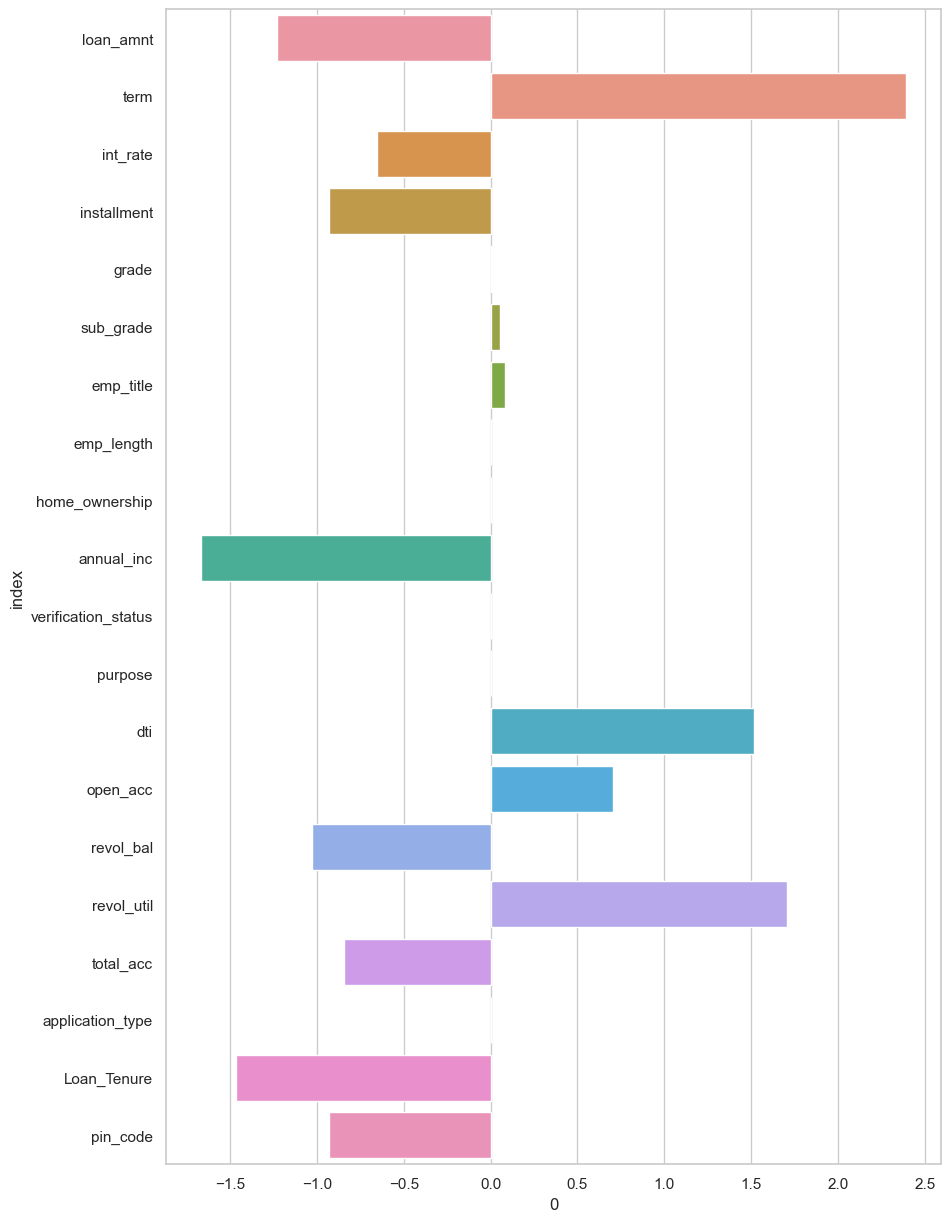

In [198]:
plt.figure(figsize=(10,15))
sns.barplot(y = feature_importance["index"],
           x =  feature_importance[0])

In [199]:
LogReg.score(X_train,y_train)

0.827406256071498

In [200]:
LogReg.score(X_test,y_test)

0.8268985669433305

<Axes: >

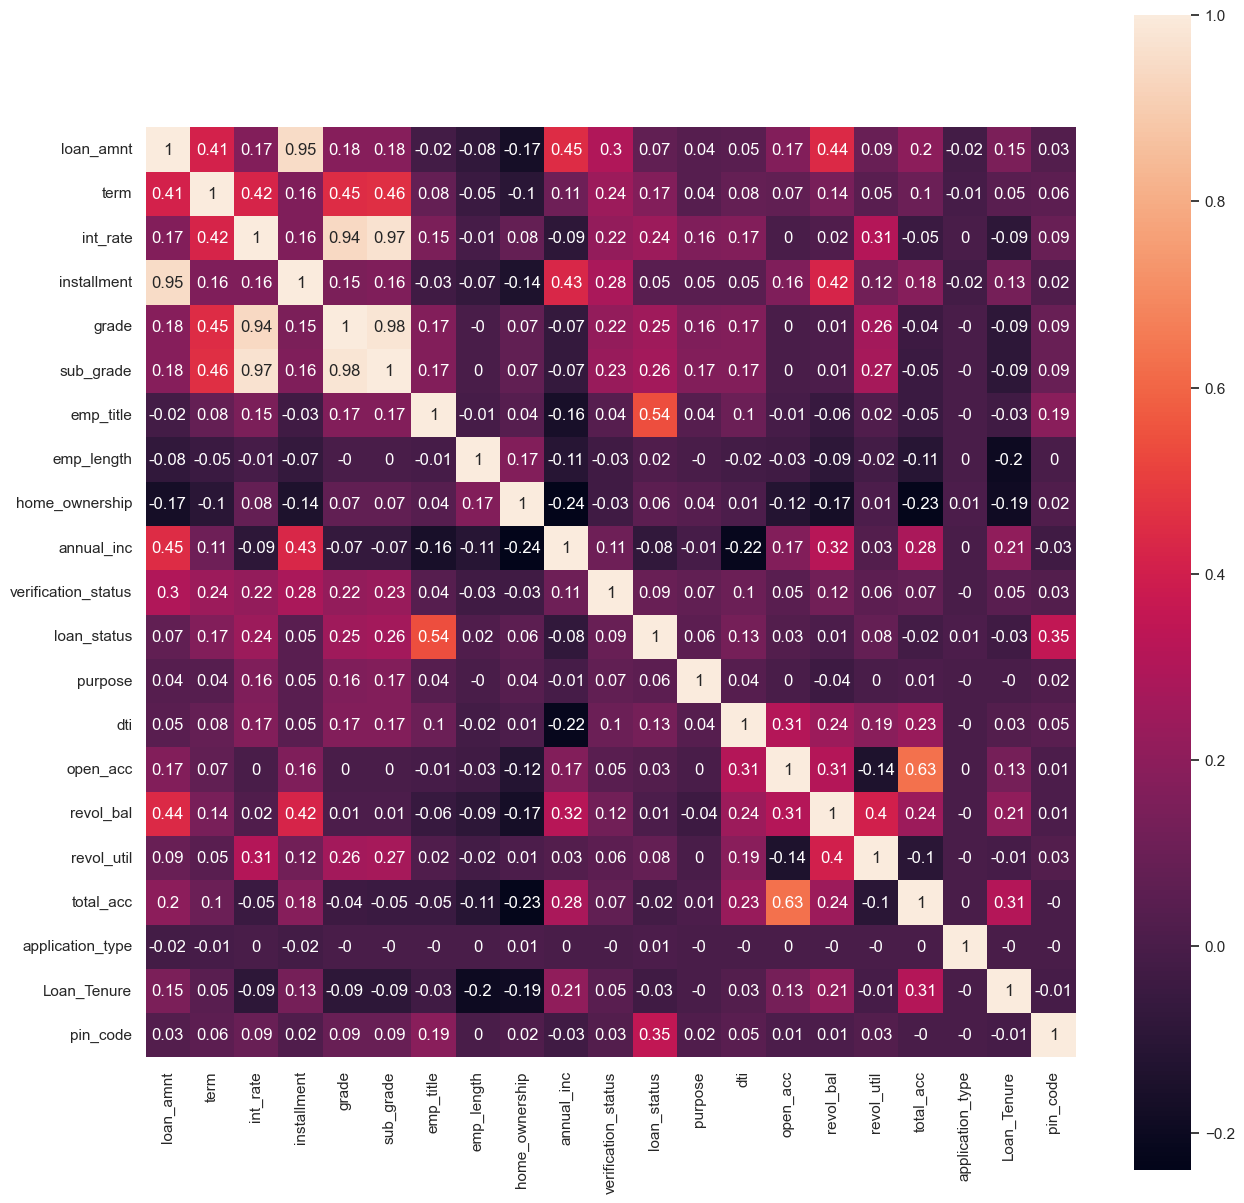

In [201]:
plt.figure(figsize=(15,15))

sns.heatmap(df.corr().round(2),annot=True,square=True)

### Metrics

In [202]:
from sklearn.metrics  import confusion_matrix, f1_score, precision_score,recall_score
confusion_matrix(y_test, LogReg.predict(X_test))



array([[43409,  8564],
       [ 2573,  9792]])

In [203]:
precision_score(y_test ,LogReg.predict(X_test))

0.5334495532795817

In [204]:
recall_score(y_test ,LogReg.predict(X_test))

0.7919126566922766

In [205]:
pd.crosstab(y_test ,LogReg.predict(X_test))

col_0,0,1
loan_status,,
0,43409,8564
1,2573,9792


In [206]:
recall_score(y_train ,LogReg.predict(X_train))

0.7909899301607926

In [207]:
recall_score(y_test ,LogReg.predict(X_test))

0.7919126566922766

In [208]:
f1_score(y_test ,LogReg.predict(X_test))

0.6374792487223723

In [209]:
f1_score(y_train ,LogReg.predict(X_train))

0.6369350738521647

In [210]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import fbeta_score

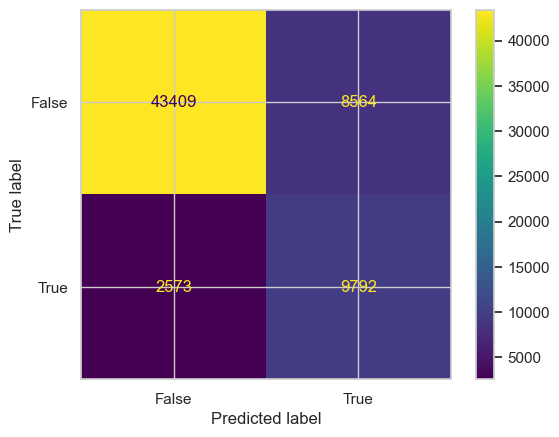

In [211]:
cm_display  = ConfusionMatrixDisplay(confusion_matrix= confusion_matrix(y_test, 
                                                          LogReg.predict(X_test)),display_labels=[False,True])
cm_display.plot()
plt.show()

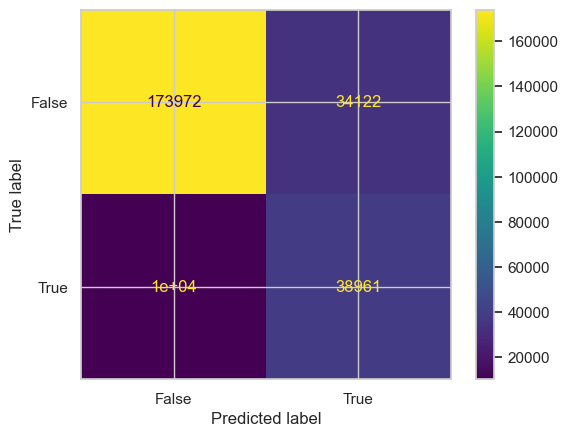

In [212]:
cm_display  = ConfusionMatrixDisplay(confusion_matrix= confusion_matrix(y_train, 
                                                          LogReg.predict(X_train)),display_labels=[False,True])
cm_display.plot()
plt.show()

### Other Algorithms

In [213]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#### `DecisionTreeClassifier`

In [214]:
DecisionTreeClassifier = DecisionTreeClassifier(max_depth=5, splitter="best",
                                               criterion="entropy",class_weight ="balanced")

DecisionTreeClassifier.fit(X_train,y_train)
DecisionTreeClassifier.score(X_test,y_test)

0.7940563896919395

#### `RandomForestClassifier`

In [215]:
RF = RandomForestClassifier(n_estimators=30,max_depth=10,class_weight="balanced")
RF.fit(X_train,y_train)
RF.score(X_test,y_test)

0.8706518698125525

In [216]:
feature_importance = pd.DataFrame(index = df.drop(["loan_status"],
                                                  axis = 1).columns,
                                  data = RF.feature_importances_.ravel()).reset_index()
feature_importance

,index,0
0,loan_amnt,0.002986
1,term,0.012010
2,int_rate,0.019820
3,installment,0.002784
4,grade,0.020874
5,sub_grade,0.052997
6,emp_title,0.554529
7,emp_length,0.000698
8,home_ownership,0.001868
9,annual_inc,0.004250


<Axes: xlabel='0', ylabel='index'>

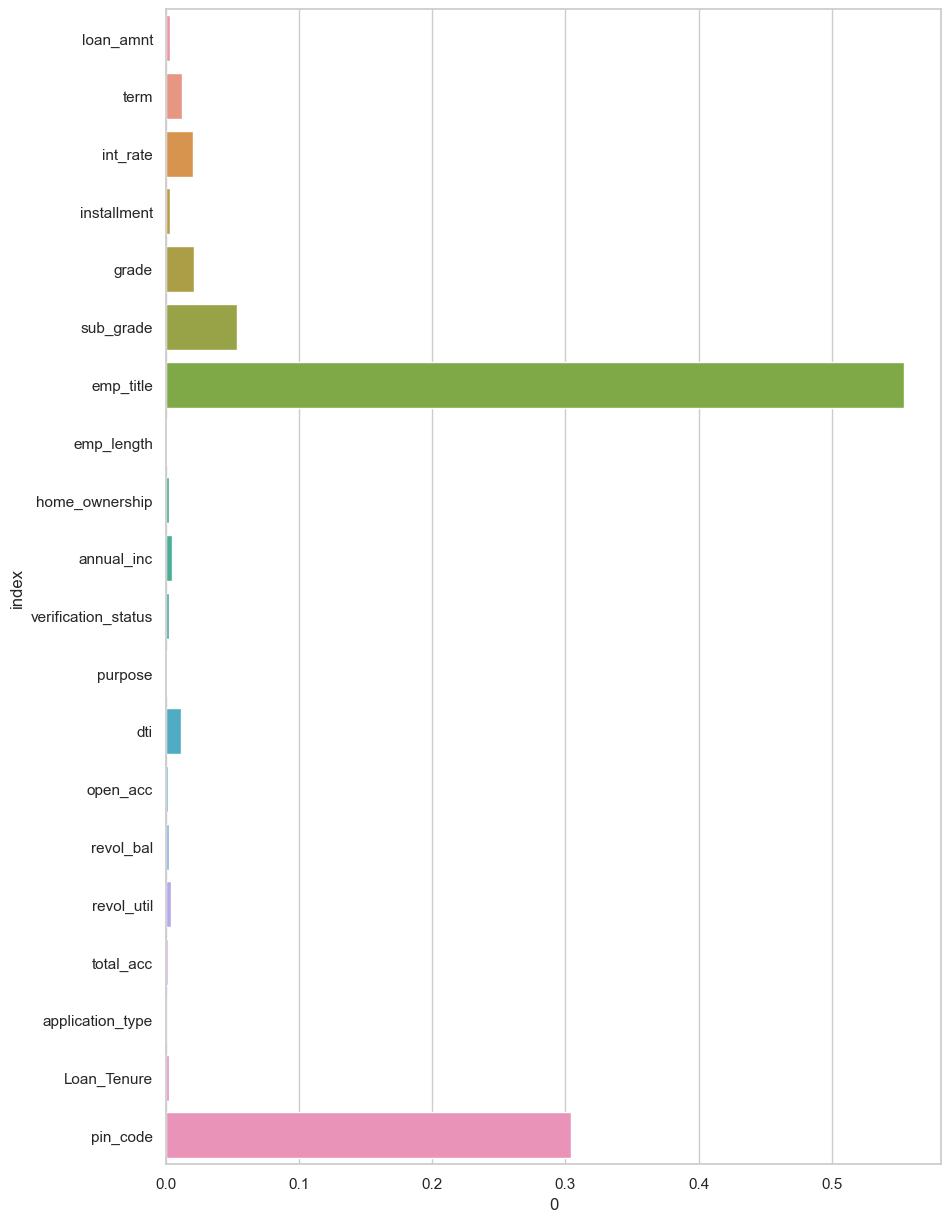

In [217]:
plt.figure(figsize=(10,15))
sns.barplot(y = feature_importance["index"],
           x =  feature_importance[0])

#### Metrics

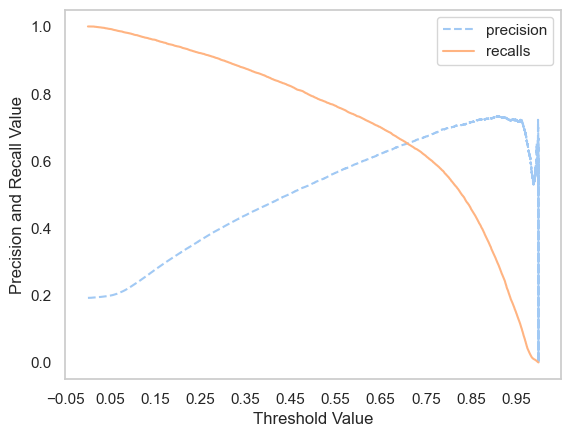

In [218]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score,roc_curve

def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

    threshold_boundary = thresholds.shape[0]
    # plot precision
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    # plot recall
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recalls')

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))

    plt.xlabel('Threshold Value'); plt.ylabel('Precision and Recall Value')
    plt.legend(); plt.grid()
    plt.show()

precision_recall_curve_plot(y_test, LogReg.predict_proba(X_test)[:,1])


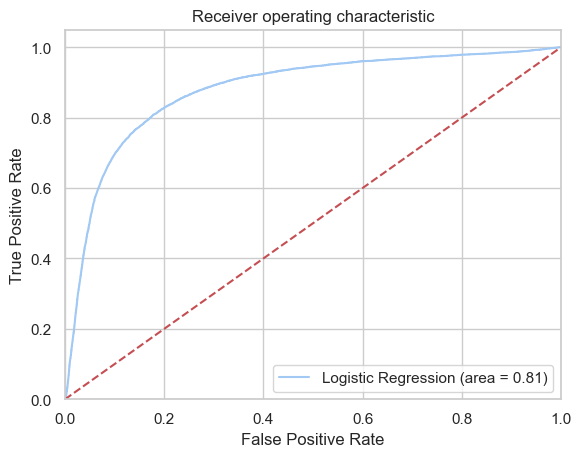

In [219]:
logit_roc_auc = roc_auc_score(y_test, LogReg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, LogReg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [220]:
LogReg.predict_proba(X_test)

array([[0.7472772 , 0.2527228 ],
       [0.84722358, 0.15277642],
       [0.51438198, 0.48561802],
       ...,
       [0.62104213, 0.37895787],
       [0.80529685, 0.19470315],
       [0.7171708 , 0.2828292 ]])

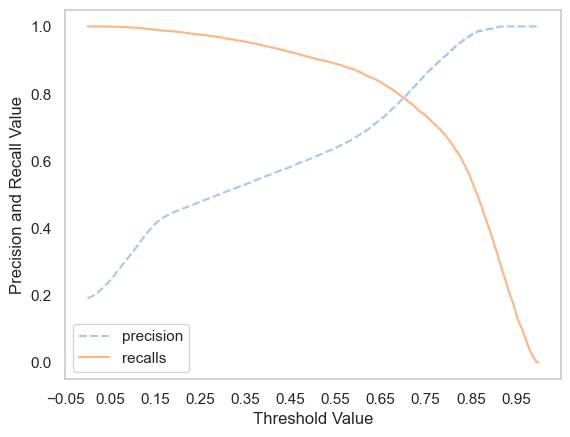

In [221]:
precision_recall_curve_plot(y_test, RF.predict_proba(X_test)[:,1])


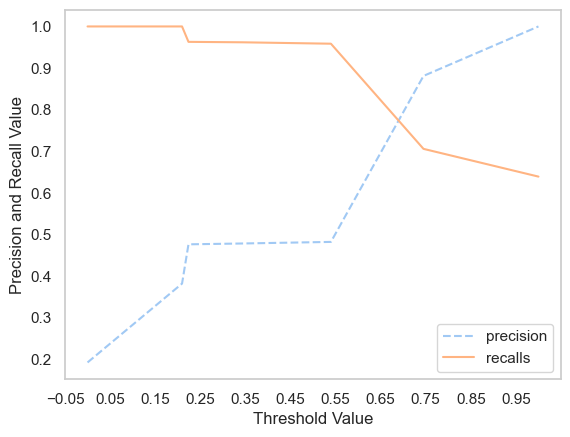

In [222]:
precision_recall_curve_plot(y_test, DecisionTreeClassifier.predict_proba(X_test)[:,1])


In [223]:
LogReg.predict_proba(X_test)[:,1]

array([0.2527228 , 0.15277642, 0.48561802, ..., 0.37895787, 0.19470315,
       0.2828292 ])

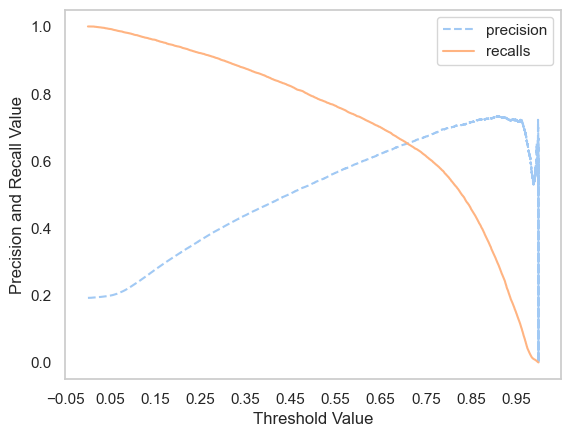

In [224]:
precision_recall_curve_plot(y_test, LogReg.predict_proba(X_test)[:,1])


In [225]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight="balanced")
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [226]:
def custom_predict(X, threshold):
    probs = model.predict_proba(X) 
    return (probs[:, 1] > threshold).astype(int)

In [227]:
new_preds = custom_predict(X=X_test, threshold=0.75)

In [228]:
model.score(X_test,y_test)

0.8297584631166651

In [229]:
precision_score(y_test,new_preds)

0.6717426563344747

<Figure size 1500x1000 with 0 Axes>

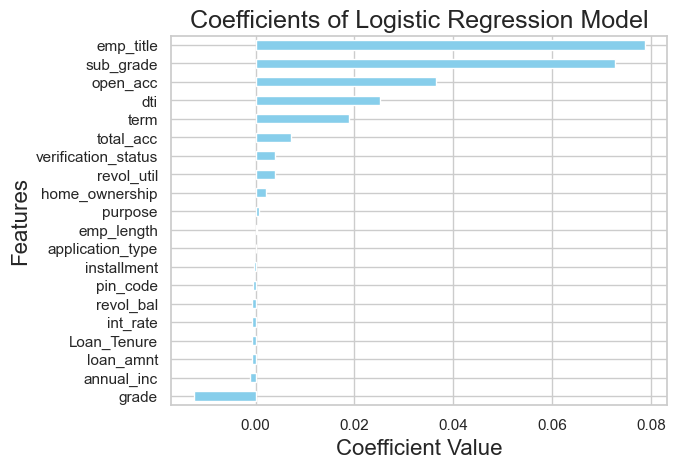

In [230]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.figure(figsize=(15, 10))
sns.set(style="whitegrid")

# Creating a horizontal bar plot with a simplified color scheme
coef_df = pd.DataFrame(data=model.coef_, columns=X.columns).T
coef_df.sort_values(by=0, inplace=True)
coef_df.plot(kind="barh", color="skyblue", legend=False)

# Adding title and labels with increased font size
plt.title("Coefficients of Logistic Regression Model", fontsize=18)
plt.xlabel("Coefficient Value", fontsize=16)
plt.ylabel("Features", fontsize=16)

# Show the plot
plt.show()


<center><h1 style="color: red;">End of the Report</h1></center>